In [301]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
import plotter as p
import jupyterlib as j
# import plotter3 as p3
import plotter4 as p4
import plotterm as pm
import importlib
from tabulate import tabulate
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

dirrs = ['logs/zte_mtn/rf_shield/ublox/', 'logs/zte_mtn/rf_shield/quectel/', 'logs/nokia_vodacom/centurycity/ublox/', 'logs/nokia_vodacom/centurycity/quectel/',
         'logs/ericsson_mtn/testplant_14th/ublox/', 'logs/ericsson_mtn/testplant_14th/quectel/', 'logs/huawei_vodacom/quellerina/ublox/', 'logs/huawei_vodacom/quellerina/quectel/',]

# files = [['release/release0/*', 'release/release1/*','release/release16/*'],['release/release64/*','release/release128/*'],['release/release256/*','release/release512/*']]
files = [['release/release0/*', 'release/release1/*','release/release16/*'],['release/release64/*'],['release/release128/*'],['release/release256/*'],['release/release512/*']]
files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*', 'echo/downlink512/*', 'echo/receive/*', 'echo/receive512/*', 'echo/send512/*', 'echo/send/*',])
files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*'])#, 'cops/tensec/*'])
files.append(['drx/cap/*'])
files.append(['ptau/capture/*'])

nTests = len(files)

In [196]:
def mdb(mean=True):
    importlib.reload(p)
    importlib.reload(j)
    mdb = []
    for f in files:
        atd = p.scatternuator('energy_snr_zte_log' + 'ky', 'kx', 'ky', 'thresh', [None]*4, 'scale', 'limited', dirrs, f, mean=mean, ttype='return')
        mdb.append(atd)
    return mdb

def db():
    return mdb(False)

In [197]:
def plot(*args, **kwargs):
    importlib.reload(pm)
    K = kwargs.pop('K') if 'K' in kwargs else None
#     p3.plot(mdb(), *args, **kwargs, folder='plotter3')
#     mcount[args[1]+' vs '+args[0]] = p3.hist()
#     p3.plot(database, *args, **kwargs, folder='plottera')
#     acount[args[1]+' vs '+args[0]] = p3.hist()
    return pm.plot(db(), *args, **kwargs, K=K if K else 3, folder='plotterm')
#     kcount[args[1]+' vs '+args[0]] = p4.hist()

In [58]:
avg_add = lambda x, div: (np.sum(x, axis=0))/(div-[*x].count(0))
avg_add([[1,2,3,4,6,0], [1,1,1,1,1,1]], 2)

array([1. , 1.5, 2. , 2.5, 3.5, 0.5])

In [59]:
g3 = lambda x : (x + '00' if '.' in x else x + '.00')[:6] if x else x
g3('123.0')

'123.00'

In [198]:
pairs = ['Ublox-ZTE', 'Quectel-ZTE', 'Ublox-Nokia', 'Quectel-Nokia', 
         'Ublox-Ericsson', 'Quectel-Ericsson', 'Ublox-Huawei', 'Quectel-Huawei', '',
         'ZTE', 'Nokia', 'Ericsson', 'Huawei',
         '*Ublox*', '*Quectel*', 'MTN', 'Vodacom', ' ']
testl = ['16 B', '64 B', '128 B', '256 B', '512 B', 'Echo', 'COPS', 'eDRX', 'PTAU']

def table(array, ttype='mean', precision=3, estimate=lambda x:x):
    c = np.array([np.array(b) for a in array for b in a])
    simplify = lambda x : np.mean(x) if ttype == 'mean' else np.percentile(x, ttype)
    e = np.array([simplify(f) if len(f) else 0 for f in c])
    e = e.reshape(nTests,-1).T
    # avg_add = lambda x, div: (np.sum(x, axis=0))/(div-[*x].count(0))
    # Vendors = np.array([avg_add(x, 2) for x in e.reshape(4,2,nTests)])
    Vendors = np.array([x[0] + x[1] for x in e.reshape(4,2,nTests)])/2
    Ublox = np.sum(e.reshape(4,2,nTests)[:,0], axis=0)/4
    Quectel = np.sum(e.reshape(4,2,nTests)[:,1], axis=0)/4
    MNOs = np.array([Vendors[0] + Vendors[2], Vendors[1] + Vendors[3]])/2
    e = np.concatenate((e, [['']*nTests]))
    e = np.concatenate((e, Vendors))
    # e = np.concatenate((e, [['']*nTests]))
    e = np.concatenate((e, [Ublox]))
    e = np.concatenate((e, [Quectel]))
    # e = np.concatenate((e, [['']*nTests]))
    e = np.concatenate((e, MNOs))
    e = np.concatenate((e, [['']*nTests]))
    # f3 = lambda x : "{0:.{}g}".format(x, precision) if not isinstance(x, str) else x
    g3 = lambda x : (x + '00' if '.' in x else x + '.00')[:precision] if x else x
    h3 = lambda x : '' if x == '0.00' else x
    # j3 = lambda x : str(60*24*365/(9360000/float(x))) if estimate else x
    str_float = lambda x : x.isnumeric() or '.' in x
    zero = lambda x : float(x) if str_float(x) else False
    e = np.array([h3(g3(estimate(x) if zero(x) else x)) for x in e.flatten()])
    e = e.reshape(-1,nTests)
    # if ttype != 'mean':
    e = np.concatenate(([pairs], e.T))
    return e.T

def ptables(name, label, metric, precision=4, estimate=lambda x:x):
#     print('\n\nTable:', name, '5th Percentile {#tbl:' + label + '_5}\n')
#     print(tabulate(table(metric, 5, precision=precision), testl, tablefmt="github", disable_numparse=True))

    print('\n\nTable:', name, '{#tbl:' + label + '}\n')
    print(tabulate(table(metric, precision=precision, estimate=estimate), testl, tablefmt="github", disable_numparse=True))

#     print('\n\nTable:', name, '95th Percentile {#tbl:' + label + '_95}\n')
#     print(tabulate(table(metric, 95, precision=precision), testl, tablefmt="github", disable_numparse=True))

In [5]:
def etables(name, label, metric, precision=4, estimate=lambda x:x):
#     print('\n\nTable:', name, '5th Percentile {#tbl:' + label + '_5}\n')
#     print(tabulate(table(metric, 5, precision=precision), testl, tablefmt="github", disable_numparse=True))

#     print('\n\nTable:', name, 'Means {#tbl:' + label + '_m}\n')
    for i in range(3):
        print(tabulate(table(metric[i], precision=precision, estimate=estimate)[-9:], ['**ECL '+str(i)+'**     '] + [len(a)*' ' for a in testl], tablefmt="github", disable_numparse=True))

# #Latency

custom jupyter @DanielRobinson
|             |         |         |        |         |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|-------------|---------|---------|--------|---------|-------------|---------------|-----------------|-------------------|
| Latency (s) | 6.98611 | 3.98429 | 22.366 | 9.47035 |     1.89863 |       2.03398 |         2.89387 |           10.9508 |
|             |    MTN |   Vodacom |
|-------------|--------|-----------|
| Latency (s) | 5.4852 |   15.9182 |
SNR (dB)


[6.986110807784075,
 3.98429074074074,
 22.36603653846154,
 9.470354699576166,
 1.898627207505519,
 2.0339836267605635,
 2.893872115384615,
 10.95084002849003]

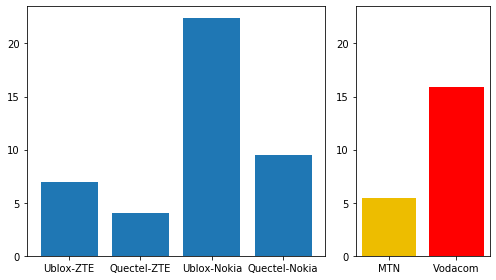

In [13]:
d, _ = plot('SNR', 'txTime', 'SNR (dB)', 'Latency (s)', scale=[10,1000], invert=[False, True], K=5)
[np.mean(m) for m in d]

In [226]:
ecl = [0,1,2,1,1,1,2,0,2,1,3]
k   = [3,2,4,3,1,2,4,3,1,2,0]
a = [[] for i in range(max(k) + 1)]
for e, k in zip(ecl, k):
    a[k].append(e)
for i in range(len(a)):
    a[i] = int(round(np.mean(a[i])))
a

[3, 2, 1, 0, 2]

In [293]:
# np.set_printoptions(precision=3)
# d, txTime, txTimeECL = plot('Signal power', 'txTime', 'RSRP (dBm)', 'Latency (s)', scale=[10,1000], invert=[False, True], K=3)

custom jupyter @DanielRobinson
['8.07', '4.60', '24.8', '10.3', '3.53', '2.65', '3.42', '11.7']


In [240]:
len(txTimeECL)

4

In [242]:
[len(e) for e in txTimeECL]

[10, 10, 10, 10]

In [244]:
[len(ui) for e in txTimeECL for ti in e for ui in ti]

[18,
 3,
 0,
 0,
 27,
 21,
 9,
 1,
 18,
 3,
 0,
 1,
 27,
 21,
 6,
 0,
 18,
 0,
 0,
 1,
 27,
 21,
 8,
 0,
 18,
 2,
 0,
 1,
 27,
 21,
 9,
 0,
 17,
 2,
 0,
 1,
 27,
 21,
 7,
 0,
 15,
 2,
 0,
 0,
 27,
 21,
 7,
 0,
 18,
 0,
 3,
 2,
 0,
 0,
 0,
 0,
 17,
 0,
 0,
 0,
 2,
 8,
 4,
 1,
 18,
 0,
 0,
 1,
 36,
 24,
 0,
 9,
 17,
 3,
 1,
 2,
 27,
 21,
 9,
 3,
 0,
 6,
 12,
 17,
 9,
 6,
 3,
 4,
 0,
 5,
 6,
 11,
 9,
 6,
 6,
 5,
 0,
 9,
 6,
 11,
 9,
 6,
 5,
 7,
 0,
 6,
 5,
 10,
 9,
 6,
 3,
 4,
 1,
 7,
 6,
 11,
 9,
 6,
 5,
 6,
 1,
 7,
 6,
 11,
 9,
 6,
 6,
 6,
 0,
 11,
 14,
 17,
 0,
 0,
 0,
 0,
 0,
 9,
 3,
 8,
 0,
 4,
 1,
 3,
 0,
 8,
 8,
 12,
 0,
 6,
 15,
 3,
 1,
 7,
 19,
 28,
 9,
 6,
 3,
 6,
 0,
 6,
 0,
 3,
 0,
 9,
 5,
 7,
 0,
 6,
 0,
 0,
 0,
 9,
 6,
 7,
 0,
 6,
 0,
 0,
 0,
 9,
 5,
 5,
 0,
 6,
 0,
 1,
 0,
 9,
 6,
 8,
 0,
 6,
 0,
 1,
 0,
 9,
 6,
 6,
 2,
 6,
 0,
 1,
 0,
 9,
 5,
 6,
 0,
 7,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 2,
 3,
 0,
 0,
 1,
 1,
 0,
 7,
 7,
 11,
 0,
 0,
 3,
 6,
 0,
 8,
 1,
 0,
 0,
 9,
 6,
 6,

In [245]:
g = np.array([np.mean(f) if len(f) else 0 for f in c]).reshape(7,-1)
Vendors = np.array([x[0] + x[1] for x in g.T.reshape(4,2,7)])
Vendors

ValueError: cannot reshape array of size 0 into shape (4,2,7)

In [219]:
Ublox = np.sum(g.T.reshape(4,2,7)[:,0], axis=0)
Ublox

array([ 41.45,  34.  ,  77.23,  32.02, 135.24,   7.41,  22.92])

In [220]:
Quectel = np.sum(g.T.reshape(4,2,7)[:,1], axis=0)
Quectel

array([55.28, 26.78, 33.59, 15.52, 16.78,  5.18, 40.43])

In [221]:
v = Vendors
MNOs = np.array([v[0] + v[2], v[1] + v[3]])
MNOs

array([[ 23.08,  12.46,  26.89,   7.26,  38.68,   1.73,  23.56],
       [ 73.64,  48.32,  83.92,  40.28, 113.34,  10.86,  39.79]])

In [635]:
d, totalTime, totalTimeECL = plot('Signal power', 'totalTime', 'RSRP (dBm)', 'Latency (s)', scale=[10,1000], invert=[False, True], K=3)

custom jupyter @DanielRobinson
['29.2', '16.6', '65.3', '24.5', '2.33', '1.30', '1.95', '8.02']


In [637]:
ptables('Latency Measurement (s)', 'txTime', totalTime)
etables('', '', totalTimeECL)



Table: Latency Measurement (s) {#tbl:txTime}

|                  | 16 B   | 64 B   | 128 B   | 256 B   | 512 B   | Echo   | COPS   | eDRX   | PTAU   |
|------------------|--------|--------|---------|---------|---------|--------|--------|--------|--------|
| Ublox-ZTE        | 111.   | 6.92   | 5.11    | 18.8    | 6.62    | 23.6   | 86.1   | 2.70   | 5.35   |
| Quectel-ZTE      | 51.0   | 4.61   | 4.82    | 4.84    | 5.49    | 12.9   | 33.9   | 2.77   | 21.4   |
| Ublox-Nokia      | 69.4   | 16.9   | 34.3    | 74.2    | 15.1    | 178.   | 148.   | 15.6   | 17.4   |
| Quectel-Nokia    | 48.9   | 10.6   | 11.1    | 12.5    | 15.9    | 45.4   | 42.3   | 11.3   | 13.8   |
| Ublox-Ericsson   | 1.21   | 1.14   | 1.26    | 1.51    | 1.84    | 19.9   | 4.78   | 0.26   | 0.98   |
| Quectel-Ericsson | 1.00   | 0.87   | 0.93    | 0.89    | 1.11    | 4.15   | 1.43   | 0.29   | 0.61   |
| Ublox-Huawei     | 1.30   | 1.11   | 1.28    | 1.09    | 1.31    | 5.17   | 4.15   | 0.15   | 3.95   |
| Quect

In [127]:
plt.yscale

Signature: plt.yscale(value, **kwargs)
Docstring:
Set the y-axis scale.

Parameters
----------
value : {"linear", "log", "symlog", "logit", ...}
    The axis scale type to apply.

**kwargs
    Different keyword arguments are accepted, depending on the scale.
    See the respective class keyword arguments:

    - `matplotlib.scale.LinearScale`
    - `matplotlib.scale.LogScale`
    - `matplotlib.scale.SymmetricalLogScale`
    - `matplotlib.scale.LogitScale`


Notes
-----
By default, Matplotlib supports the above mentioned scales.
Additionally, custom scales may be registered using
`matplotlib.scale.register_scale`. These scales can then also
be used here.
File:      ~/.local/lib/python3.6/site-packages/matplotlib/pyplot.py
Type:      function


In [299]:
def box(data, name, ylabel, ylim=(None, None), log=True, loc='upper right', line=None, spacing=None):
    rotation = 20
    figsize=(6,4)
    subpairs = ['ZTE', 'Nokia', 'Ericsson', 'Huawei', 'Ublox', 'Quectel', 'MTN', 'Vodacom']
    plt.rcParams.update({'font.size': 12})
    plt.figure(figsize=figsize)
    bplot = plt.boxplot(data, labels=subpairs, patch_artist=True,)
    colors = [(237/255, 189/255, 0), 'red', (237/255, 189/255, 0), 'red', 'lightblue', 'lightgreen', (237/255, 189/255, 0), 'red',]
    for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)
    plt.ylabel(ylabel)
    plt.xlabel('')
    # plt.ylim(None, 14)
#     ticks, labels = plt.yticks()        # Get locations and labels
#     plt.yticks(ticks, [scale*labels],)  # Set locations and labels
    if log:
        plt.yscale('log')
    plt.ylim(ylim)
    ax = plt.gca()
    if log:
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(max(y, 0.01)),0)))).format(y)))
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.rcParams.update({'font.size': 10})
    ax.legend([bplot["boxes"][0], bplot["boxes"][1]], ['MTN NB-IoT', 'Vodacom NB-IoT'], loc=loc)
    if line:
        x, _ = plt.xticks()
        plt.plot([0] + x.tolist() + [9], [line]*10, 'purple')
        plt.xlim(0.5,8.5)
    if spacing:
        ax.yaxis.set_major_locator(MultipleLocator(spacing))
    plt.savefig('./box/' + name + '.pdf')
    plt.savefig('./box/' + name + '.png')
    plt.show()

In [109]:
def group(d):
    d = np.array(d)
    zte = d[0] + d[1]
    nokia = d[2] + d[3]
    ericsson = d[4] + d[5]
    huawei = d[6] + [7]
    ublox = d[0] + d[2] + d[4] + d[6]
    quectel = d[1] + d[3] + d[5] + d[7]
    mtn = zte + ericsson
    vodacom = nokia + huawei
    return [zte, nokia, ericsson, huawei, ublox, quectel, mtn, vodacom]

In [161]:
d_latency, txTime, txTimeECL = plot('Signal power', 'txTime', 'RSRP (dBm)', 'Latency (s)', scale=[10,1000], invert=[False, True], K=3)

plotter @Daniel.Robinson
custom jupyter @DanielRobinson
['8.07', '4.60', '24.8', '10.3', '3.52', '2.65', '3.44', '11.7']


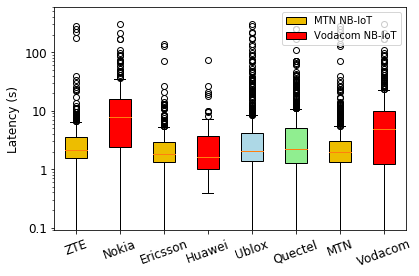

In [169]:
box(group(d_latency), 'latency', 'Latency (s)', (0.09, 600))

In [163]:
d_txTimeNW, txTimeNW, txTimeNW_ECL = plot('Signal power', 'txTimeNW', 'RSRP (dBm)', 'Transmit Latency (s)', scale=[10,1000], invert=[False, True], K=5)

plotter @Daniel.Robinson
custom jupyter @DanielRobinson
['0.74', '0.51', '1.94', '1.46', '0.66', '0.24', '0.96', '0.80']


In [164]:
d_rxTimeNW, rxTimeNW, rxTimeNW_ECL = plot('Signal power', 'rxTimeNW', 'RSRP (dBm)', 'Receive Latency (s)', scale=[10,1000], invert=[False, True])

plotter @Daniel.Robinson
custom jupyter @DanielRobinson
['3.69', '1.26', '9.25', '45.2', '1.31', '1.19', '6.25', '8.54']


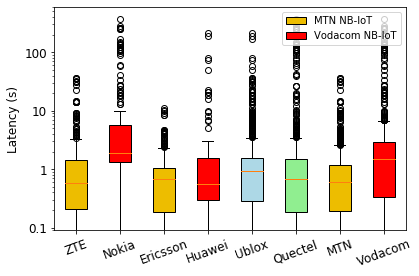

In [170]:
box(group(np.array(d_txTimeNW) + np.array(d_rxTimeNW)), 'latencyEst', 'Latency (s)', (0.09, 600))

In [190]:
a = np.array(d_txTimeNW)
b = np.array(d_rxTimeNW)
p = np.array([np.array(x) for x in a])*250
q = np.array([np.array(x) for x in b])*60
r = np.array([x.tolist() for x in p]) + np.array([x.tolist() for x in q])

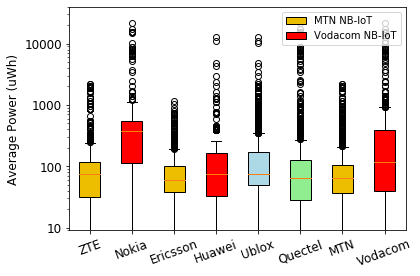

In [193]:
box(group(r), 'avgpowerEst', 'Average Power (uWh)', (9, 40000))

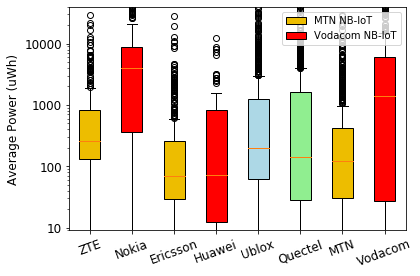

In [192]:
box(group(d_energy), 'avgpower', 'Average Power (uWh)', (9, 40000))

In [71]:
d_energy, energy, energy_ECL = plot('Signal power', 'energy', 'RSRP (dBm)', 'Energy (mWh)', [10,3.6], [False, True])

plotter @Daniel.Robinson
custom jupyter @DanielRobinson
['4261', '2413', '1489', '5267', '884.', '464.', '1103', '5145']


In [292]:
d_ecl, ecl, ecl_ECL = plot('Signal power', 'ECL', 'RSRP (dBm)', 'ECL', [10,1], [False, True], en_ECL=False)

plotter @Daniel.Robinson
custom jupyter @DanielRobinson
['0.2', '1.30', '1.17', '1.03', '0.37', '0.61', '0.91', '1.27']


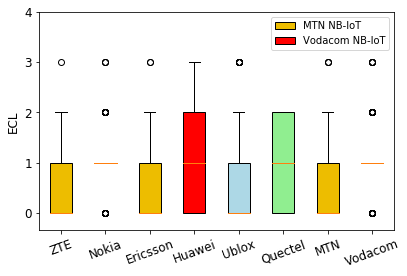

In [303]:
g_ecl = group(d_ecl)
box(g_ecl, 'ecl', 'ECL', (None, 4), log=False, spacing=1)

In [319]:
[len(g) for g in g_ecl]

[116, 144, 211, 68, 280, 312, 327, 212]

In [352]:
e = []
for g in g_ecl:
    n, _ = np.histogram(g, bins=[0,1,2,3])
    e.append(n)
e

[array([59, 30, 27]),
 array([ 12, 110,  22]),
 array([136,  45,  30]),
 array([25, 25, 17]),
 array([150,  91,  39]),
 array([ 91, 140,  81]),
 array([195,  75,  57]),
 array([ 37, 135,  39])]

In [353]:
np.array(e).T

array([[ 59,  12, 136,  25, 150,  91, 195,  37],
       [ 30, 110,  45,  25,  91, 140,  75, 135],
       [ 27,  22,  30,  17,  39,  81,  57,  39]])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

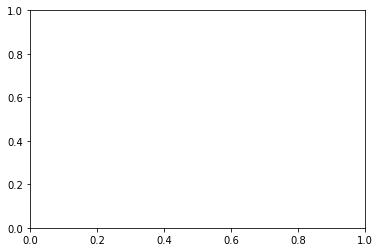

In [354]:
plt.bar([0,1,2,3,4,5,6,7], np.array(e), stacked=True)

In [390]:
e

[array([59, 30, 27]),
 array([ 12, 110,  22]),
 array([136,  45,  30]),
 array([25, 25, 17]),
 array([150,  91,  39]),
 array([ 91, 140,  81]),
 array([195,  75,  57]),
 array([ 37, 135,  39])]

In [398]:
ne = []
for r in e:
    ne.append(r/sum(r)*100)
ne

[array([50.862, 25.862, 23.276]),
 array([ 8.333, 76.389, 15.278]),
 array([64.455, 21.327, 14.218]),
 array([37.313, 37.313, 25.373]),
 array([53.571, 32.5  , 13.929]),
 array([29.167, 44.872, 25.962]),
 array([59.633, 22.936, 17.431]),
 array([17.536, 63.981, 18.483])]

In [406]:
pd.DataFrame?

Init signature: pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
Docstring:     
Two-dimensional size-mutable, potentially heterogeneous tabular data
structure with labeled axes (rows and columns). Arithmetic operations
align on both row and column labels. Can be thought of as a dict-like
container for Series objects. The primary pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, or list-like objects

    .. versionchanged :: 0.23.0
       If data is a dict, column order follows insertion-order for
       Python 3.6 and later.

    .. versionchanged :: 0.25.0
       If data is a list of dicts, column order follows insertion-order
       Python 3.6 and later.

index : Index or array-like
    Index to use for resulting frame. Will default to RangeIndex if
    no indexing information part of input data and no index provided
columns : Index or array-l

In [422]:
p = pd.DataFrame(ne, columns=['ECL 0', 'ECL 1', 'ECL 2'], index=['ZTE', 'Nokia', 'Ericsson', 'Huawei', 'Ublox', 'Quectel', 'MTN', 'Vodacom'])
p

,ECL 0,ECL 1,ECL 2
ZTE,50.862069,25.862069,23.275862
Nokia,8.333333,76.388889,15.277778
Ericsson,64.454976,21.327014,14.218009
Huawei,37.313433,37.313433,25.373134
Ublox,53.571429,32.500000,13.928571
Quectel,29.166667,44.871795,25.961538
MTN,59.633028,22.935780,17.431193
Vodacom,17.535545,63.981043,18.483412


In [400]:
[sum(p.T[key]) for key in p.T]

[100.0, 100.0, 100.0, 100.0, 100.0, 100.00000000000001, 100.0, 100.0]

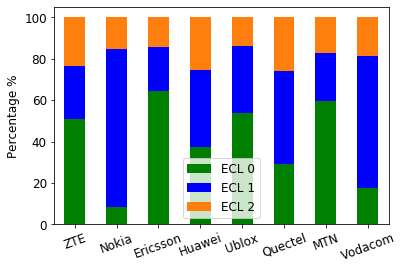

In [433]:
plt.rcParams.update({'font.size': 12})
p.plot(kind='bar', stacked=True, color=['green', 'blue', 'tab:orange'])
plt.ylabel('Percentage %')
plt.xticks(rotation=20)
name = 'ecl_bar'
plt.savefig('./box/' + name + '.pdf')
plt.savefig('./box/' + name + '.png')

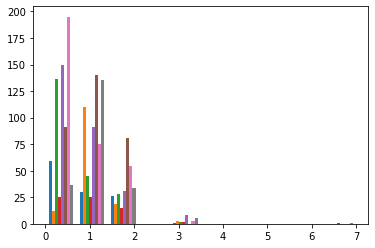

In [325]:
n, bins, _ = plt.hist(np.array([np.array(g) for g in g_ecl]).T)

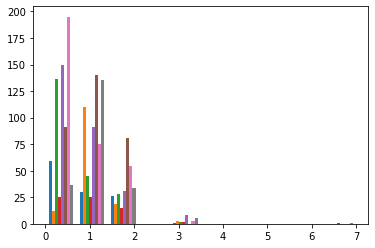

In [340]:
n, bins, _ = plt.hist(g_ecl)

In [338]:
a = np.array(n).T[:3].T
a

array([[ 59.,  30.,  26.],
       [ 12., 110.,  19.],
       [136.,  45.,  28.],
       [ 25.,  25.,  15.],
       [150.,  91.,  31.],
       [ 91., 140.,  81.],
       [195.,  75.,  54.],
       [ 37., 135.,  34.]])

ValueError: `bins` must be 1d, when an array

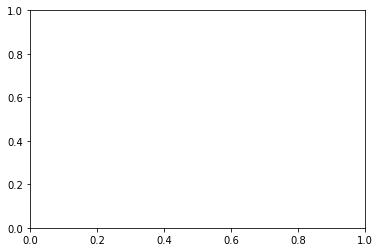

In [339]:
plt.hist([0,1,2,3,4,5,6,7], a)

TypeError: only size-1 arrays can be converted to Python scalars

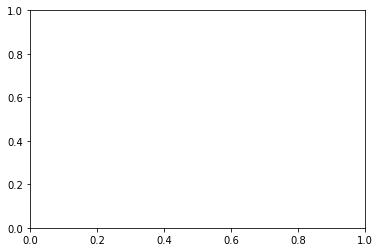

In [336]:
plt.bar([0, 1, 2], np.array(n).T[:3].T)

In [103]:
d_RLC_UL, RLC_UL, RLC_UL_ECL = plot('Signal power', 'RLC UL', 'RSRP (dBm)', 'RLC UL (B)', scale=[10,1], invert=[False, True], K=3)

plotter @Daniel.Robinson
custom jupyter @DanielRobinson
['363.', '492.', '205.', '374.', '535.', '186.', '168.', '181.']


In [104]:
d_RLC_DL, RLC_DL, RLC_DL_ECL = plot('Signal power', 'RLC DL', 'RSRP (dBm)', 'RLC DL (B)', scale=[10,1], invert=[False, True], K=3)

plotter @Daniel.Robinson
custom jupyter @DanielRobinson
['146.', '221.', '48.6', '76.8', '93.5', '166.', '786.', '60.9']


In [105]:
d_MAC_UL, MAC_UL, MAC_UL_ECL = plot('Signal power', 'MAC UL', 'RSRP (dBm)', 'MAC UL (B)', scale=[10,1], invert=[False, True], K=3)

plotter @Daniel.Robinson
custom jupyter @DanielRobinson
['569.', '570.', '307.', '388.', '708.', '293.', '232.', '198.']


In [106]:
d_MAC_DL, MAC_DL, MAC_DL_ECL = plot('Signal power', 'MAC DL', 'RSRP (dBm)', 'MAC UL (B)', scale=[10,1], invert=[False, True], K=3)

plotter @Daniel.Robinson
custom jupyter @DanielRobinson
['165.', '296.', '57.9', '82.8', '116.', '136.', '966.', '138.']


In [152]:
d_txBytes, txBytes, txBytesECL = plot('Signal power', 'txBytes', 'RSRP (dBm)', 'TX Bytes (B)', scale=[10,1], invert=[False, True], K=3)

plotter @Daniel.Robinson
custom jupyter @DanielRobinson
['955.', '373.', '444.', '3017', '291.', '271.', '624.', '295.']


In [153]:
d_rxBytes, rxBytes, rxBytesECL = plot('Signal power', 'rxBytes', 'RSRP (dBm)', 'RX Bytes (B)', scale=[10,1], invert=[False, True], K=3)

plotter @Daniel.Robinson
custom jupyter @DanielRobinson
['389.', '102.', '130.', '701.', '83.5', '73.5', '553.', '140.']


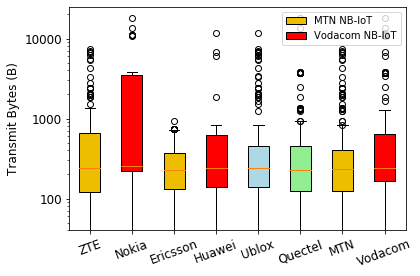

In [159]:
box(group(d_txBytes), 'txBytes', 'Transmit Bytes (B)', (40, 25000))

In [273]:
[0] + x.tolist()

[0, 1, 2, 3, 4, 5, 6, 7, 8]

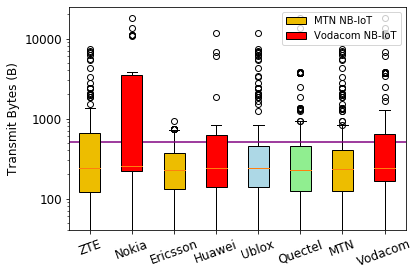

In [285]:
box(group(d_txBytes), 'txBytes', 'Transmit Bytes (B)', (40, 25000), line=512)

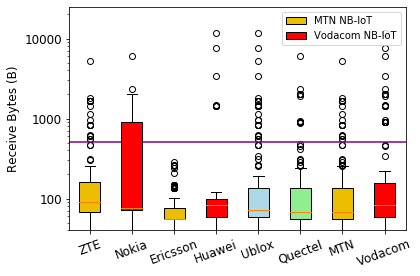

In [286]:
box(group(d_rxBytes), 'rxBytes', 'Receive Bytes (B)', (40, 25000), line=512)

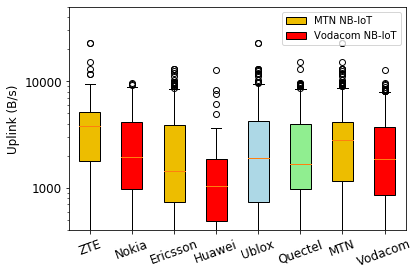

In [149]:
t = group(np.array(d_RLC_UL) + np.array(d_MAC_UL))
box(np.array([np.array(a) for a in t])*8, 'mac_rlc_ul', 'Uplink (bps)', (400, 50000))

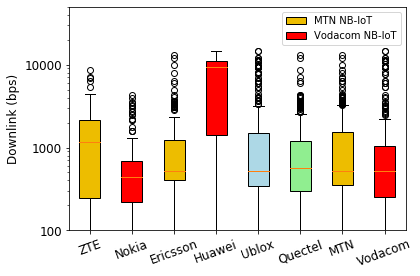

In [151]:
t = group(np.array(d_RLC_DL) + np.array(d_MAC_DL))
box(np.array([np.array(a) for a in t])*8, 'mac_rlc_dl', 'Downlink (bps)', (100, 50000))

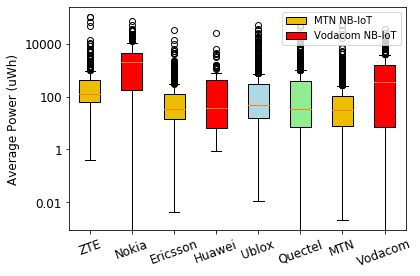

In [87]:
box(group(d_energy), 'avgpower', 'Average Power (uWh)', )#(10, 30000))

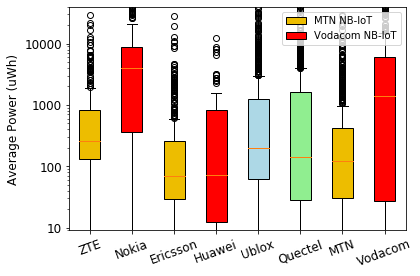

In [101]:
box(group(d_energy), 'avgpower', 'Average Power (uWh)', (9, 40000))

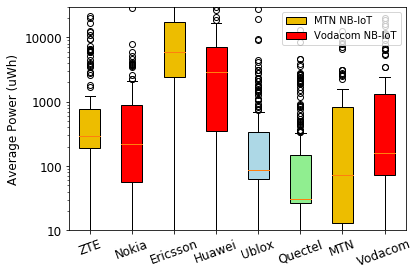

In [39]:
box(d_energy, 'avgpower', 'Average Power (uWh)', (10, 30000))

In [260]:
d_sinr, sinr, sinr_ECL = plot('Signal power', 'SNR', 'RSRP (dBm)', 'SINR (dB)', [10,10], [False, True])

plotter @Daniel.Robinson
custom jupyter @DanielRobinson
['3.71', '2.62', '3.56', '4.25', '22.8', '21.5', '5.50', '2.35']


In [261]:
t_sinr = d_sinr.copy()
t = np.array(d_sinr[4])
t_sinr[4] = t[[t < 15][0]].tolist()
t = np.array(d_sinr[5])
t_sinr[5] = t[[t < 15][0]].tolist()

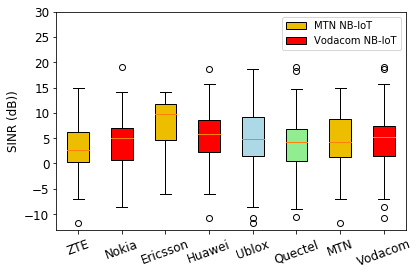

In [262]:
box(group(t_sinr), 'SINRperceived', 'SINR (dB))', (None, 30), False, 'upper right')

In [233]:
d_rsrp, rsrp, rsrp_ECL = plot('Total power', 'Signal power', 'RSSI (dBm)', 'RSRP (dBn)', [10,10], [False, True])

plotter @Daniel.Robinson
custom jupyter @DanielRobinson
['-103', '-105', '-95.', '-98.', '-81.', '-79.', '-104', '-106']


In [237]:
t_rsrp = d_rsrp.copy()
t = np.array(d_rsrp[4])
t_rsrp[4] = t[[t < -70][0]].tolist()
t = np.array(d_rsrp[5])
t_rsrp[5] = t[[t < -70][0]].tolist()

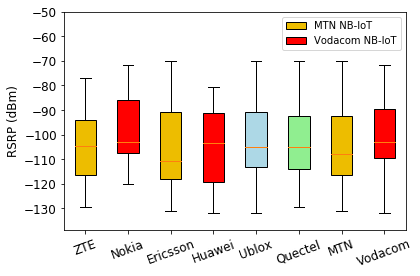

In [248]:
box(group(t_rsrp), 'RSRPperceived', 'RSRP (dBm)', (None, -50), False, 'upper right')

In [240]:
mcl = group(t_rsrp)
min(mcl[0]) - 23

-152.6

In [241]:
min(mcl[1]) - 23

-143.0

In [243]:
min(mcl[2]) - 23

-154.0

In [242]:
min(mcl[3]) - 23

-155.0

In [245]:
for m in mcl:
    print(min(m) - 23)

-152.6
-143.0
-154.0
-155.0
-155.0
-152.45
-154.0
-155.0


In [ ]:
d, sinr, sinr_ECL = plot('Signal power', 'SNR', 'RSRP (dBm)', 'SINR (dB)', [10,10], [False, True])

In [619]:
9360000/24*365*e

8760

In [654]:
len(array[1])

9

In [10]:
subpairs = ['ZTE', 'Nokia', 'Ericsson', 'Huawei', 'Ublox', 'Quectel', 'MTN', 'Vodacom']

In [26]:
nRelease = 4

In [25]:
array = energy_ECL[1][:nRelease]
c = np.array([np.array(b) for a in array for b in a])
c.shape

(32,)

In [31]:
c = c.reshape(8, -1)

In [23]:
g = {}

In [76]:
flat = lambda x: [b for a in x for b in a]

In [77]:
flatAdd = lambda x, y: flat(x) + flat(y)

In [46]:
c[1]

array([array([ 392.653, 1415.797,  276.479,  339.052, 1547.983,  474.75 ,
        377.681, 1727.906,  514.204]),
       array([ 28.862, 159.514,   5.789,  27.804, 172.589,  37.264]),
       array([59.789, 69.008, 20.339, 33.103]),
       array([ 96.289, 180.969, 100.092, 994.797])], dtype=object)

In [69]:
add = lambda p, q: np.array([np.array([*x] + [*y]) for x, y in zip(p, q)])

1

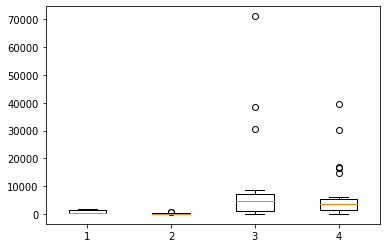

In [72]:
plt.boxplot(add(c[0], c[1]))
1

In [51]:
t = [*c[0]]

In [107]:
def group(array, nRelease=5):
    c = np.array([np.array(b) for a in array[:nRelease] for b in a]).reshape(8, -1)
        
    g = {}
    g['ZTE'] = flatAdd(c[0], c[1])
    g['Nokia'] = flatAdd(c[2], c[3])
    g['Ericsson'] = flatAdd(c[4], c[5])
    g['Huawei'] = flatAdd(c[6], c[7])
    g['Ublox'] = [flat(c[0]) + flat(c[2]) + flat(c[4]) + flat(c[6])]
    g['Quectel'] = [flat(c[1]) + flat(c[3]) + flat(c[5]) + flat(c[7])]
    g['MTN'] = g['ZTE'] + g['Ericsson']
    g['Vodacom'] = g['Nokia'] + g['Huawei']
    plt.figure()
    plt.boxplot([g[k] for k in g], labels=[k for k in g])
#     return g

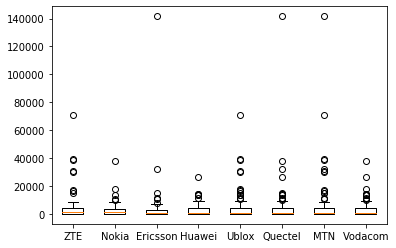

In [108]:
group(energy_ECL[1])

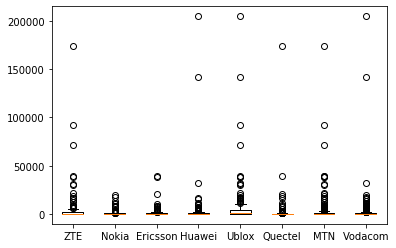

In [105]:
group(energy)

In [92]:
plt.boxplot?

Signature:
plt.boxplot(
    x,
    notch=None,
    sym=None,
    vert=None,
    whis=None,
    positions=None,
    widths=None,
    patch_artist=None,
    bootstrap=None,
    usermedians=None,
    conf_intervals=None,
    meanline=None,
    showmeans=None,
    showcaps=None,
    showbox=None,
    showfliers=None,
    boxprops=None,
    labels=None,
    flierprops=None,
    medianprops=None,
    meanprops=None,
    capprops=None,
    whiskerprops=None,
    manage_ticks=True,
    autorange=False,
    zorder=None,
    *,
    data=None,
)
Docstring:
Make a box and whisker plot.

Make a box and whisker plot for each column of ``x`` or each
vector in sequence ``x``.  The box extends from the lower to
upper quartile values of the data, with a line at the median.
The whiskers extend from the box to show the range of the
data.  Flier points are those past the end of the whiskers.

Parameters
----------
x : Array or a sequence of vectors.
    The input data.

notch : bool, optional (False)
    I

In [662]:
len(array[0])

8

1

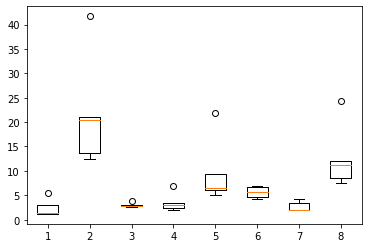

In [671]:
plt.boxplot([[1.18, 1.30, 1.23, 5.50, 2.93], [20.5, 12.4, 21.1, 41.7, 13.7], [2.84, 2.54, 2.81, 3.08, 3.76], [2.04, 2.47, 2.91, 6.96, 3.37], [6.51, 5.08, 9.43, 21.8, 6.16], [6.79, 4.29, 4.64, 6.82, 5.76], [2.01, 1.92, 2.02, 4.29, 3.34], [11.2, 7.45, 12.0, 24.3, 8.57]])
1

2

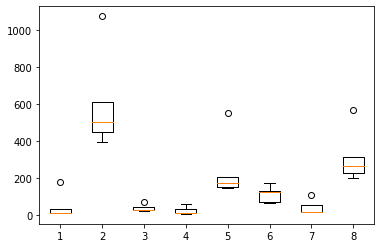

In [675]:
plt.boxplot([[9.11, 12.1, 9.09, 179., 32.6], [612., 395., 447., 1077, 502.], [24.0, 19.9, 26.1, 41.3, 71.6], [10.9, 5.02, 8.26, 58.5, 30.2], [204., 152., 174., 551., 147.], [124., 63.5, 71.4, 127., 170.], [16.5, 16.0, 17.6, 110., 52.1], [311., 200., 227., 568., 266.], ])
2

1

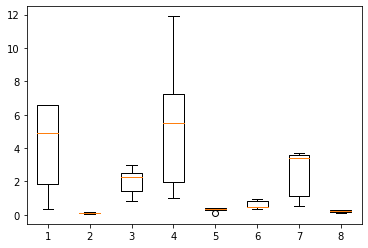

In [676]:
plt.boxplot([[6.58, 4.92, 6.59, 0.33, 1.83], [0.09, 0.15, 0.13, 0.05, 0.11], [2.49, 3.01, 2.29, 1.45, 0.83], [5.49, 11.9, 7.26, 1.02, 1.98], [0.29, 0.39, 0.34, 0.10, 0.40], [0.48, 0.94, 0.83, 0.47, 0.35], [3.61, 3.73, 3.40, 0.54, 1.15], [0.19, 0.29, 0.26, 0.10, 0.22], ])
1

2

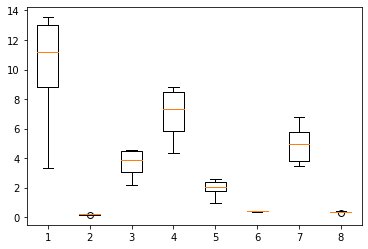

In [677]:
plt.boxplot([[3.33, 13.0, 11.21, 13.54, 8.79], [0.16, 0.19, 0.18, 0.20, 0.19, ], [4.52, 4.56, 3.89, 3.05, 2.18, ], [8.45, 8.82, 5.84, 7.35, 4.38, ], [0.96, 2.42, 2.03, 2.59, 1.81, ], [0.42, 0.42, 0.40, 0.43, 0.39, ], [3.82, 6.82, 5.79, 4.96, 3.50, ], [0.32, 0.38, 0.36, 0.40, 0.36, ], ])
2

In [ ]:
g = {}
g[pairs[0]] = array[0]

In [647]:
def group(array, ttype='mean', precision=3, estimate=lambda x:x):
    c = np.array([np.array(b) for a in array for b in a])
    print(c)
#     simplify = lambda x : np.mean(x) if ttype == 'mean' else np.percentile(x, ttype)
#     e = np.array([simplify(f) if len(f) else 0 for f in c])
#     e = e.reshape(nTests,-1).T
#     # avg_add = lambda x, div: (np.sum(x, axis=0))/(div-[*x].count(0))
#     # Vendors = np.array([avg_add(x, 2) for x in e.reshape(4,2,nTests)])
#     Vendors = np.array([x[0] + x[1] for x in e.reshape(4,2,nTests)])/2
#     Ublox = np.sum(e.reshape(4,2,nTests)[:,0], axis=0)/4
#     Quectel = np.sum(e.reshape(4,2,nTests)[:,1], axis=0)/4
#     MNOs = np.array([Vendors[0] + Vendors[2], Vendors[1] + Vendors[3]])/2
#     e = np.concatenate((e, [['']*nTests]))
#     e = np.concatenate((e, Vendors))
#     # e = np.concatenate((e, [['']*nTests]))
#     e = np.concatenate((e, [Ublox]))
#     e = np.concatenate((e, [Quectel]))
#     # e = np.concatenate((e, [['']*nTests]))
#     e = np.concatenate((e, MNOs))
#     e = np.concatenate((e, [['']*nTests]))
#     # f3 = lambda x : "{0:.{}g}".format(x, precision) if not isinstance(x, str) else x
#     g3 = lambda x : (x + '00' if '.' in x else x + '.00')[:precision] if x else x
#     h3 = lambda x : '' if x == '0.00' else x
#     # j3 = lambda x : str(60*24*365/(9360000/float(x))) if estimate else x
#     str_float = lambda x : x.isnumeric() or '.' in x
#     zero = lambda x : float(x) if str_float(x) else False
#     e = np.array([h3(g3(estimate(x) if zero(x) else x)) for x in e.flatten()])
#     e = e.reshape(-1,nTests)
#     # if ttype != 'mean':
#     e = np.concatenate(([pairs], e.T))
#     return e.T

group(energy)

[array([  244.984, 92207.325, 21598.019,   166.965,   846.35 ,   497.983,
         264.183, 12000.239,  2925.997,   197.641,   730.017,   471.451,
        2599.277,   357.118,  9596.914,   217.717,  3839.278,   760.369])
 array([ 139.953,  780.589,   89.303,  617.592,  153.291,  112.5  ,
        805.019,   96.124,  162.788,  220.423,  447.889,  161.29 ,
        359.027, 2294.985, 4659.022])
 array([  693.35 , 30564.917,  8462.764,  4772.519,  3549.764,  5866.372,
        3954.206,  2370.294,  4860.881, 71141.3  , 38405.714,  4585.764,
        7739.85 ,  5086.964])
 array([ 1626.167, 30146.731,  4217.338, 16953.439,  4435.341, 39645.819,
        1777.701,  7189.487,  4603.199,  3241.908,  5363.475,  1526.781,
       16537.789,  2759.958,  1704.568, 14790.65 ,  1583.908,  1329.769,
        1622.9  ,  6248.697,  2617.364,  4849.692,  3506.619,  3900.831])
 array([  58.547,  196.708,   61.335,   62.149,  195.394,   54.803,
         55.612,  184.261,   62.579,   61.937,  194.956,   55.417,


In [8]:
rotation = 20
figsize=(6,4)
plt.rcParams.update({'font.size': 12})

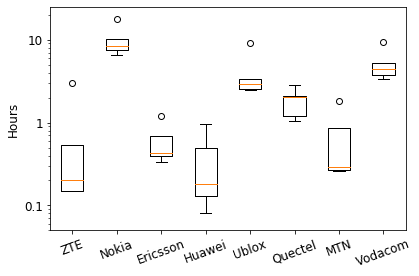

In [207]:
subpairs = ['ZTE', 'Nokia', 'Ericsson', 'Huawei', 'Ublox', 'Quectel', 'MTN', 'Vodacom']
interval = [[0.15, 0.20, 0.15, 2.99, 0.54,], [10.2, 6.59, 7.45, 17.9, 8.37,], [0.40, 0.33, 0.43, 0.68, 1.19,], [0.18, 0.08, 0.13, 0.97, 0.50,], [3.40, 2.54, 2.90, 9.19, 2.46,], [2.06, 1.05, 1.19, 2.11, 2.84,], [0.27, 0.26, 0.29, 1.84, 0.86,], [5.19, 3.33, 3.79, 9.47, 4.43,], ]
plt.figure(figsize=figsize)
plt.boxplot(interval, labels=subpairs)
plt.ylabel('Hours')
plt.xlabel('')
# plt.ylim(None, 11)
plt.yscale('log')
plt.ylim(0.05, 25)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(max(y, 0.01)),0)))).format(y)))
plt.xticks(rotation=rotation)
plt.tight_layout()
# plt.savefig('./box/intervalECL1.pdf')
# plt.savefig('./box/intervalECL1.png')
plt.show()

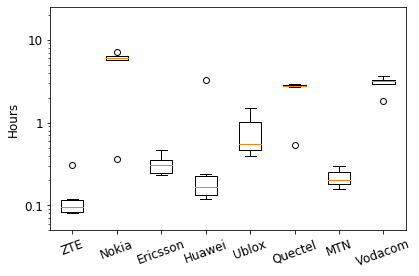

In [211]:
# subpairs = ['ZTE', 'Nokia', 'Ericsson', 'Huawei', 'Ublox', 'Quectel', 'MTN', 'Vodacom']
intervalEst = [[0.31, 0.09, 0.10, 0.08, 0.12, 0.01], [7.17, 5.98, 6.31, 5.67, 6.21, 0.36], [0.24, 0.23, 0.27, 0.34, 0.47, 0.36], [0.13, 0.12, 0.18, 0.15, 0.24, 3.28], [1.17, 0.45, 0.54, 0.40, 0.57, 1.48], [2.76, 2.75, 2.89, 2.72, 2.94, 0.53], [0.27, 0.16, 0.18, 0.21, 0.30, 0.19], [3.66, 3.04, 3.25, 2.90, 3.23, 1.82], ]
plt.figure(figsize=figsize)
plt.boxplot(intervalEst, labels=subpairs)
plt.ylabel('Hours')
plt.xlabel('')
# plt.ylim(None, 11)
plt.yscale('log')
plt.ylim(0.05, 25)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(max(y, 0.01)),0)))).format(y)))
plt.xticks(rotation=rotation)
plt.tight_layout()
plt.savefig('./box/intervalEstECL1.pdf')
plt.savefig('./box/intervalEstECL1.png')
plt.show()

In [38]:
rotation = 20
figsize=(6,4)
subpairs = ['ZTE', 'Nokia', 'Ericsson', 'Huawei', 'Ublox', 'Quectel', 'MTN', 'Vodacom']

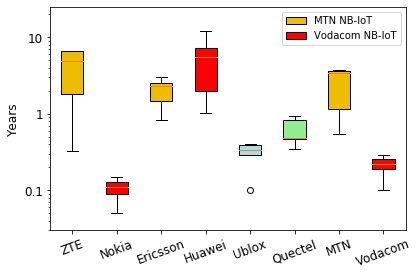

In [53]:
plt.rcParams.update({'font.size': 12})
longevity = [[6.58, 4.92, 6.59, 0.33, 1.83,], [0.09, 0.15, 0.13, 0.05, 0.11,], [2.49, 3.01, 2.29, 1.45, 0.83,], [5.49, 11.9, 7.26, 1.02, 1.98,], [0.29, 0.39, 0.34, 0.10, 0.40,], [0.48, 0.94, 0.83, 0.47, 0.35,], [3.61, 3.73, 3.40, 0.54, 1.15,], [0.19, 0.29, 0.26, 0.10, 0.22,], ]
plt.figure(figsize=figsize)
bplot = plt.boxplot(longevity, labels=subpairs, patch_artist=True,)
colors = [(237/255, 189/255, 0), 'red', (237/255, 189/255, 0), 'red', 'lightblue', 'lightgreen', (237/255, 189/255, 0), 'red',]
for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
plt.ylabel('Years')
plt.xlabel('')
# plt.ylim(None, 14)
plt.yscale('log')
plt.ylim(0.03, 25)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(max(y, 0.01)),0)))).format(y)))
plt.xticks(rotation=rotation)
plt.tight_layout()
plt.rcParams.update({'font.size': 10})
ax.legend([bplot["boxes"][0], bplot["boxes"][1]], ['MTN NB-IoT', 'Vodacom NB-IoT'], loc='upper right')
plt.savefig('./box/longevityECL1.pdf')
plt.savefig('./box/longevityECL1.png')
plt.show()

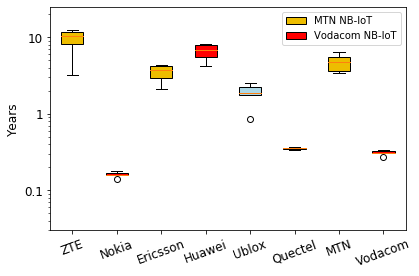

In [52]:
plt.rcParams.update({'font.size': 12})
longevityEst = [3.25, 11.75, 10.26, 12.45, 8.19], [0.14, 0.17, 0.16, 0.18, 0.16], [4.22, 4.31, 3.70, 2.94, 2.11], [7.87, 8.13, 5.45, 6.84, 4.15], [0.86, 2.22, 1.86, 2.50, 1.74], [0.36, 0.36, 0.35, 0.37, 0.34], [3.65, 6.37, 5.45, 4.73, 3.36], [0.27, 0.33, 0.31, 0.34, 0.31], 
plt.figure(figsize=figsize)
bplot = plt.boxplot(longevityEst, labels=subpairs, patch_artist=True,)
colors = [(237/255, 189/255, 0), 'red', (237/255, 189/255, 0), 'red', 'lightblue', 'lightgreen', (237/255, 189/255, 0), 'red',]
for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
plt.ylabel('Years')
plt.xlabel('')
# plt.ylim(None, 14)
plt.yscale('log')
plt.ylim(0.03, 25)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(max(y, 0.01)),0)))).format(y)))
plt.xticks(rotation=rotation)
plt.tight_layout()
plt.rcParams.update({'font.size': 10})
ax.legend([bplot["boxes"][0], bplot["boxes"][1]], ['MTN NB-IoT', 'Vodacom NB-IoT'], loc='upper right')
plt.savefig('./box/longevityEstECL1.pdf')
plt.savefig('./box/longevityEstECL1.png')
plt.show()

In [14]:
print('\n\n\\newpage\n## SINR')
ptables('SINR (dB)', 'SNR', sinr, precision=6)
etables('', '', sinr_ECL)



\newpage
## SINR


Table: SINR (dB) {#tbl:SNR}

|                  | 16 B   | 64 B   | 128 B   | 256 B   | 512 B   | Echo   | COPS   | eDRX   | PTAU   |
|------------------|--------|--------|---------|---------|---------|--------|--------|--------|--------|
| Ublox-ZTE        | 4.9157 | 4.8879 | 4.4467  | 5.1152  | 3.8929  | 1.7888 | 3.9665 | 1.8265 | 2.7666 |
| Quectel-ZTE      | 3.9372 | 3.1366 | 3.1214  | 3.3533  | 3.5933  | 1.8872 | 1.5103 | 0.6386 | 3.1138 |
| Ublox-Nokia      | 2.0557 | 0.4166 | -1.070  | 4.3916  | 5.0888  | 6.0039 | 2.2833 | 2.5903 | 5.0884 |
| Quectel-Nokia    | 3.5555 | 4.4083 | 4.7166  | 4.6615  | 5.1000  | 6.4396 | -0.216 | 1.2780 | 6.5623 |
| Ublox-Ericsson   | 24.300 | 24.270 | 24.499  | 24.460  | 24.467  | 3.2116 | 26.650 | 21.463 | 24.172 |
| Quectel-Ericsson | 21.869 | 22.157 | 21.783  | 21.762  | 21.815  | 20.293 | 19.882 | 21.600 | 22.061 |
| Ublox-Huawei     | 4.8695 | 5.1962 | 5.1842  | 4.3222  | 5.0370  | 4.7015 | 9.9333 | 4.1742 | 8.9391 |
| Que

In [66]:
print('\n\n\\newpage\n## Energy')
ptables('Energy (uWh)', 'energy', energy, precision=6)
etables('', '', energy_ECL)



\newpage
## Energy


Table: Energy (uWh) {#tbl:energy}

|                  | 16 B   | 64 B   | 128 B   | 256 B   | 512 B   | Echo   | COPS   | eDRX   | PTAU   |
|------------------|--------|--------|---------|---------|---------|--------|--------|--------|--------|
| Ublox-ZTE        | 8306.7 | 1409.9 | 828.29  | 12242.  | 1303.3  | 2719.9 | 11596. | 41.817 | 298.77 |
| Quectel-ZTE      | 739.98 | 500.84 | 554.34  | 897.32  | 1128.5  | 779.02 | 1816.9 | 52.334 | 13778. |
| Ublox-Nokia      | 13718. | 10161. | 11472.  | 31622.  | 6955.6  | 21088. | 47927. | 3778.3 | 11189. |
| Quectel-Nokia    | 7590.8 | 3618.9 | 4420.9  | 6020.0  | 10139.  | 6467.9 | 515.02 | 2083.1 | 5664.0 |
| Ublox-Ericsson   | 273.28 | 234.07 | 291.53  | 453.77  | 730.29  | 9864.6 | 3133.5 | 61.501 | 167.14 |
| Quectel-Ericsson | 205.01 | 149.33 | 178.99  | 143.03  | 345.02  | 2377.7 | 348.18 | 91.928 | 63.772 |
| Ublox-Huawei     | 504.79 | 375.92 | 424.11  | 396.78  | 404.39  | 4635.4 | 3107.1 | 3.7946 | 2005.7

In [128]:
ptables('Latency Measurement (s)', 'txTime', txTime)
etables('', '', txTimeECL)

print('\n\n\\newpage\n## TX Time')
ptables('TX Time (s)', 'txTimeNW', txTimeNW)
etables('', '', txTimeNW_ECL)

print('\n\n\\newpage\n## RX Time')
ptables('RX Time (s)', 'rxTimeNW', rxTimeNW)
etables('', '', rxTimeNW_ECL)

print('\n\n\\newpage\n## Energy')
ptables('Energy (uWh)', 'energy', energy, precision=6)
etables('', '', energy_ECL)

interval = lambda x : str(24*365/(9360000/float(x))) # minutes
print('\n\n\\newpage\n# Appendix B {-#appendixB}\n## Interval Estimate')
ptables('Interval Estimate (hours) for 9.36Wh AA battery (Lithium Thionyl Chloride) to last 1 year.', 'energy_interval', energy, precision=6, estimate=interval)
etables('', '', energy_ECL, estimate=interval)

longevity = lambda x : str(9360000/(24*365*float(x))) # years
print('\n\n\\newpage\n## Longevity Estimate')
ptables('Longevity Estimate (years) for 9.36Wh AA battery (Lithium Thionyl Chloride) with hourly uses.', 'energy_longevity', energy, precision=5, estimate=longevity)
etables('', '', energy_ECL, estimate=longevity)



Table: Latency Measurement (s) {#tbl:txTime}

|                  | 16 B   | 64 B   | 128 B   | 256 B   | 512 B   | Echo   | COPS   | eDRX   | PTAU   |
|------------------|--------|--------|---------|---------|---------|--------|--------|--------|--------|
| Ublox-ZTE        | 15.5   | 3.54   | 3.49    | 15.3    | 4.97    | 5.04   | 23.3   | 0.39   | 1.87   |
| Quectel-ZTE      | 2.79   | 2.70   | 2.85    | 3.18    | 3.56    | 2.20   | 3.26   | 0.58   | 18.1   |
| Ublox-Nokia      | 21.0   | 15.4   | 32.8    | 72.6    | 13.5    | 26.9   | 97.5   | 5.89   | 13.1   |
| Quectel-Nokia    | 19.0   | 8.84   | 9.22    | 10.6    | 14.0    | 13.3   | 1.88   | 3.67   | 9.38   |
| Ublox-Ericsson   | 2.21   | 2.18   | 2.25    | 2.61    | 2.89    | 27.6   | 8.15   | 0.35   | 1.85   |
| Quectel-Ericsson | 2.56   | 2.14   | 2.20    | 2.14    | 2.46    | 6.85   | 3.93   | 0.39   | 1.64   |
| Ublox-Huawei     | 2.62   | 2.04   | 2.14    | 2.22    | 2.49    | 9.10   | 6.22   | 0.76   | 6.01   |
| Quect

In [578]:
'8306.768176150346'.isnumeric()

False

In [569]:
float('8306.768176150346')

8306.768176150346

In [423]:
[*np.array([len(a) for a in txTime])].count(8)

9

In [75]:
pd.DataFrame(e)

,0,1,2,3,4,5,6
0,15.529157,4.410214,17.411276,5.049611,23.326424,0.392823,1.876372
1,2.771470,3.069139,3.833100,2.206250,3.262216,0.587367,18.189241
2,21.073079,25.112400,54.354519,26.967593,97.529167,5.897775,13.168206
3,19.001326,9.567800,12.317881,13.316360,1.887182,3.671062,9.389375
4,2.218850,2.412663,2.976794,NaN,8.159500,0.356930,1.856580
5,2.565171,2.567636,2.673088,NaN,3.930083,0.393233,1.640829
6,2.628544,2.064861,2.487745,NaN,6.222833,0.762118,6.014272
7,30.938616,11.573295,14.761256,NaN,7.703400,0.524259,11.213953


In [40]:
# [np.mean(b) for a in h for b in a]
[np.mean(b) if len(b) else 0 for a in h for b in a]

[15.529157053376903,
 2.7714700000000003,
 21.073078571428567,
 19.001326388888888,
 2.2188503306878307,
 2.5651710648148147,
 2.6285435185185184,
 30.938616468253972,
 4.410214281705948,
 3.0691388888888893,
 25.112399999999997,
 9.567800000000002,
 2.412662632275133,
 2.5676361111111117,
 2.0648612433862437,
 11.573294841269842,
 17.4112764329806,
 3.833100000000001,
 54.35451851851852,
 12.317880952380952,
 2.9767939814814808,
 2.6730883928571427,
 2.487744708994709,
 14.761255952380955,
 5.049611026936027,
 2.20625,
 26.96759259259259,
 13.316359649122807,
 0,
 0,
 0,
 0,
 23.326424369747905,
 3.2622161375661376,
 97.52916666666665,
 1.8871818181818178,
 8.159500000000001,
 3.9300833333333327,
 6.222833333333334,
 7.703399999999999,
 0.3928231481481481,
 0.5873666666666666,
 5.897775000000001,
 3.6710620039682538,
 0.3569300925925926,
 0.39323333333333343,
 0.7621175925925925,
 0.5242592592592593,
 1.8763718253968251,
 18.1892414021164,
 13.168206349206352,
 9.389375396825397,
 1.8

In [31]:
np.set_printoptions(precision=3, suppress=True)
print(np.array([np.percentile(a, 5) for a in d]))
print(np.array([np.mean(a) for a in d]))
print(np.array([np.percentile(a, 95) for a in d]))

[0.125 0.218 0.312 0.379 0.069 0.14  0.622 0.392]
[ 9.605  5.086 25.523 10.4    2.038  2.145  3.012 12.338]
[23.283  7.751 91.874 30.906  5.183  5.144  9.637 60.149]


custom jupyter @DanielRobinson
|             |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|-------------|-------------|---------------|-----------------|-------------------|
| Latency (s) |     4.69124 |       10.7602 |         12.5608 |           24.8234 |
|             |     MTN |   Vodacom |
|-------------|---------|-----------|
| Latency (s) | 7.72571 |   18.6921 |
Transmit power (dBm)


[4.6912374633996, 10.76019214008689, 12.560801853305422, 24.823389158730162]

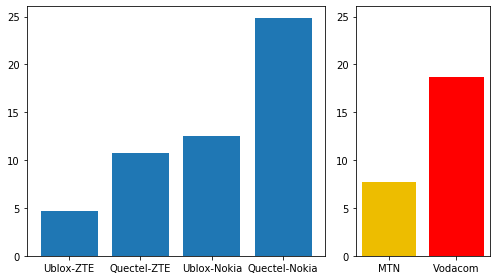

In [174]:
d=plot('TX power', 'txTime', 'Transmit power (dBm)', 'Latency (s)', scale=[10,1000], invert=[False, True])#, loc='best', bbox=None)
[np.mean(m) for m in d]

# #Power saving

In [176]:
# print(tabulate([np.insert([str(np.mean(m)) for m in d], 0, 'Energy (J)')], nw, tablefmt="github"))

In [177]:
tab = []
nw = ["Metric", "Ublox-MTN", "Quectel-MTN", "Ublox-Vodacom", "Quectel-Vodacom"]
for c, n in zip(d, nw):
#     u, cnts = np.unique(c, return_counts=True)
    cnts = np.mean(c)
    print(cnts)
    t = [n, cnts]
    t = [r for r in t]
    print(t)
    tab.append(t)
headers = nw
tab[0].append(0)
print(tabulate(tab, nw, tablefmt="github"))

11.351947932565846
['Metric', 11.351947932565846]
21.971477757625962
['Ublox-MTN', 21.971477757625962]
21.996763925838895
['Quectel-MTN', 21.996763925838895]
57.70982148726836
['Ublox-Vodacom', 57.70982148726836]
| Metric        |   Ublox-MTN |   Quectel-MTN |
|---------------|-------------|---------------|
| Metric        |     11.3519 |             0 |
| Ublox-MTN     |     21.9715 |               |
| Quectel-MTN   |     21.9968 |               |
| Ublox-Vodacom |     57.7098 |               |


In [178]:
tab

[['Metric', 11.351947932565846, 0],
 ['Ublox-MTN', 21.971477757625962],
 ['Quectel-MTN', 21.996763925838895],
 ['Ublox-Vodacom', 57.70982148726836]]

In [179]:
print(tabulate([[1,2,3]], [4,5,6], tablefmt="github"))

|   4 |   5 |   6 |
|-----|-----|-----|
|   1 |   2 |   3 |


custom jupyter @DanielRobinson
|            |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|------------|-------------|---------------|-----------------|-------------------|
| Energy (J) |     11.3519 |       21.9708 |         21.9968 |           57.7098 |
|            |     MTN |   Vodacom |
|------------|---------|-----------|
| Energy (J) | 16.6614 |   39.8533 |
RSRP (dBm)


[11.351947932565846, 21.97075225396296, 21.996763925838902, 57.70982148726834]

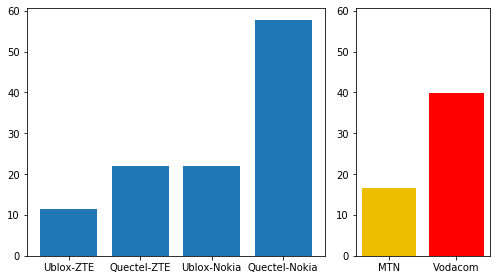

In [180]:
d=plot('Signal power', 'energy', 'RSRP (dBm)', 'Energy (J)', [10,1000], [False, True])
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|            |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|------------|-------------|---------------|-----------------|-------------------|
| Energy (J) |     11.3519 |       21.9718 |         21.9968 |           57.7099 |
|            |     MTN |   Vodacom |
|------------|---------|-----------|
| Energy (J) | 16.6619 |   39.8533 |
RSSI (dBm)


[11.351947918238903, 21.97180436441661, 21.996763925838902, 57.70989985205814]

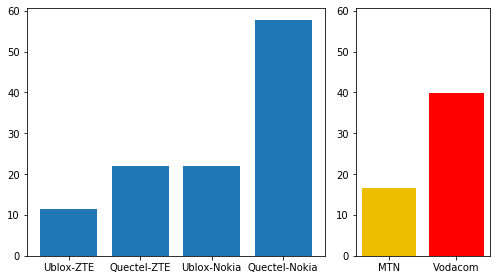

In [181]:
d=plot('Total power', 'energy', 'RSSI (dBm)', 'Energy (J)', scale=[10,1000], invert=[False, True])
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|                  |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|------------------|-------------|---------------|-----------------|-------------------|
| Max current (mA) |     102.837 |       104.121 |         106.566 |           108.684 |
|                  |     MTN |   Vodacom |
|------------------|---------|-----------|
| Max current (mA) | 103.479 |   107.625 |
RSRP (dBm)


[102.8372399445215, 104.121374633996, 106.56608314211228, 108.68369708994709]

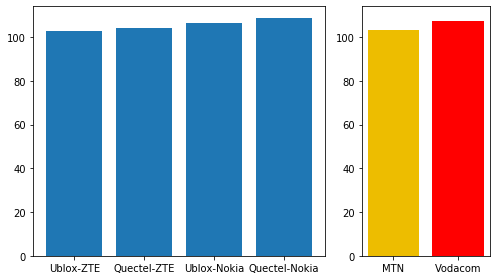

In [182]:
d=plot('Signal power', 'maxCurrent', 'RSRP (dBm)', 'Max current (mA)', scale=[10,1], invert=[False, True])#, loc='lower left', bbox=None)
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|                    |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|--------------------|-------------|---------------|-----------------|-------------------|
| Transmit power (dB |     16.9598 |        14.801 |         16.1628 |           18.6389 |
|                    |     MTN |   Vodacom |
|--------------------|---------|-----------|
| Transmit power (dB | 15.8804 |   17.4008 |
RSRP (dBm)


[16.959821428571427, 14.800966183574879, 16.162790697674417, 18.63888888888889]

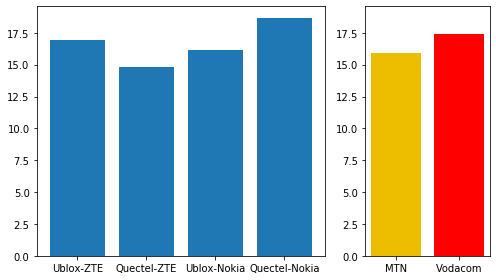

In [183]:
d=plot('Signal power', 'TX power', 'RSRP (dBm)', 'Transmit power (dBm)', scale=[10,10], invert=[False, True])#, loc='lower left', bbox=None)
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|                    |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|--------------------|-------------|---------------|-----------------|-------------------|
| Transmit power (dB |     16.9777 |       14.8986 |          16.093 |           18.6389 |
|                    |     MTN |   Vodacom |
|--------------------|---------|-----------|
| Transmit power (dB | 15.9381 |    17.366 |
RSSI (dBm)


[16.977678571428573, 14.898550724637682, 16.093023255813954, 18.63888888888889]

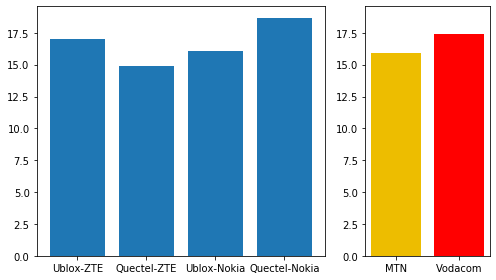

In [184]:
d=plot('Total power', 'TX power', 'RSSI (dBm)', 'Transmit power (dBm)', scale=[10,10], invert=[False, True])#, loc='lower left', bbox=None)
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|            |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|------------|-------------|---------------|-----------------|-------------------|
| Energy (J) |     11.3183 |       22.1932 |         38.7086 |           68.3731 |
|            |     MTN |   Vodacom |
|------------|---------|-----------|
| Energy (J) | 16.7558 |   53.5408 |
Latency (s)


[11.318317651098114, 22.193196764645528, 38.708550239090805, 68.37307637751529]

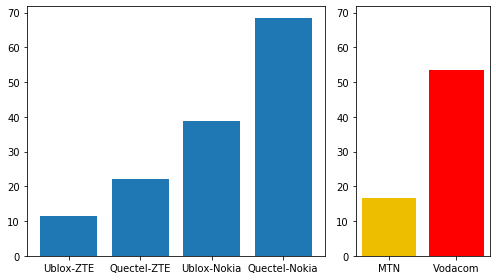

In [185]:
d=plot('txTime', 'energy', 'Latency (s)', 'Energy (J)', [1000,1000], [True, False])
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|            |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|------------|-------------|---------------|-----------------|-------------------|
| Energy (J) |     10.1416 |       21.9395 |         21.9968 |           54.0368 |
|            |     MTN |   Vodacom |
|------------|---------|-----------|
| Energy (J) | 16.0406 |   38.0168 |
Transmit power (dBm)


[10.14161808313274, 21.939541627835062, 21.996815150328697, 54.03677804447294]

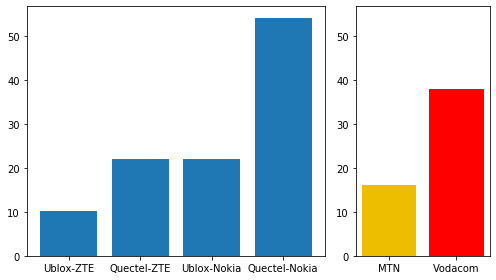

In [186]:
d=plot('TX power', 'energy', 'Transmit power (dBm)', 'Energy (J)', scale=[10,1000], invert=[False, True])#, loc='center left', bbox=None)
[np.mean(m) for m in d]

# #RF Receive metrics

RSRQ = N x RSRP / RSSI

In [187]:
# -200 = N * -130 / -110

# 13/11

custom jupyter @DanielRobinson
|            |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|------------|-------------|---------------|-----------------|-------------------|
| RSSI (dBm) |    -93.3134 |      -89.4922 |        -83.2977 |          -82.2805 |
|            |      MTN |   Vodacom |
|------------|----------|-----------|
| RSSI (dBm) | -91.4028 |  -82.7891 |
RSRP (dBm)


[-93.3133629148629, -89.4921922244422, -83.29772708314786, -82.2805074199305]

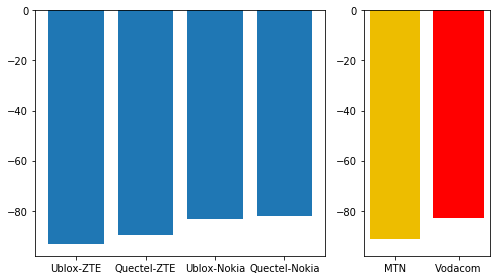

In [188]:
d=plot('Signal power', 'Total power', 'RSRP (dBm)', 'RSSI (dBm)', scale=[10,10], invert=[False, True])#, loc='lower right', bbox=None)
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|           |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|-----------|-------------|---------------|-----------------|-------------------|
| SINR (dB) |     2.76909 |       4.09459 |         3.48348 |            3.2307 |
|           |     MTN |   Vodacom |
|-----------|---------|-----------|
| SINR (dB) | 3.43184 |   3.35709 |
RSRP (dBm)


[2.769086954711955, 4.094593577835175, 3.4834812675619715, 3.230699216395419]

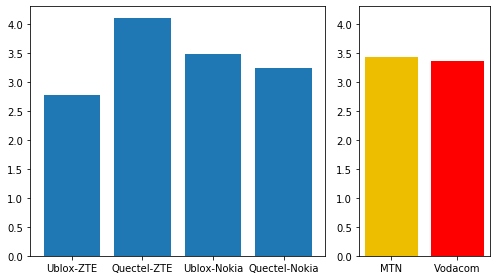

In [189]:
d=plot('Signal power', 'SNR', 'RSRP (dBm)', 'SINR (dB)', scale=[10,10], invert=[False, True])
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|           |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|-----------|-------------|---------------|-----------------|-------------------|
| RSRQ (dB) |    -13.0974 |      -12.9318 |        -13.1988 |          -13.0928 |
|           |      MTN |   Vodacom |
|-----------|----------|-----------|
| RSRQ (dB) | -13.0146 |  -13.1458 |
RSRP (dBm)


[-13.097435897435897,
 -12.93178420256992,
 -13.198833819241985,
 -13.092823305386595]

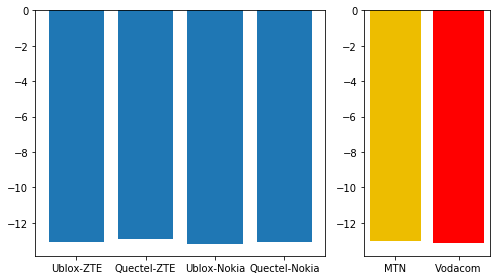

In [190]:
d=plot('Signal power', 'RSRQ', 'RSRP (dBm)', 'RSRQ (dB)', scale=[10,10], invert=[False, True])#, loc='lower right', bbox=None)
[np.mean(m) for m in d]

# #Packet metrics

custom jupyter @DanielRobinson
|              |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|--------------|-------------|---------------|-----------------|-------------------|
| TX Bytes (B) |     345.799 |        852.68 |            3113 |           446.482 |
|              |     MTN |   Vodacom |
|--------------|---------|-----------|
| TX Bytes (B) | 599.239 |   1779.74 |
RSRP (dBm)


[345.7986486486487, 852.6797899159665, 3112.9957264957266, 446.48214285714283]

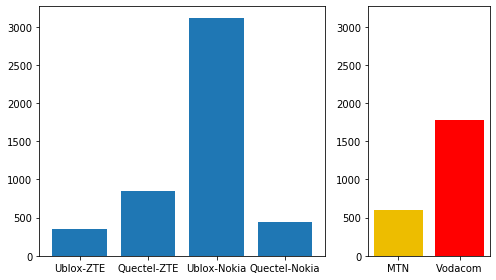

In [191]:
d=plot('Signal power', 'txBytes', 'RSRP (dBm)', 'TX Bytes (B)', scale=[10,1], invert=[False, True], K=3)
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|              |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|--------------|-------------|---------------|-----------------|-------------------|
| RX Bytes (B) |     109.161 |       386.651 |         769.311 |           147.708 |
|              |     MTN |   Vodacom |
|--------------|---------|-----------|
| RX Bytes (B) | 247.906 |    458.51 |
RSRP (dBm)


[345.7986486486487, 852.6797899159665, 3112.9957264957266, 446.48214285714283]

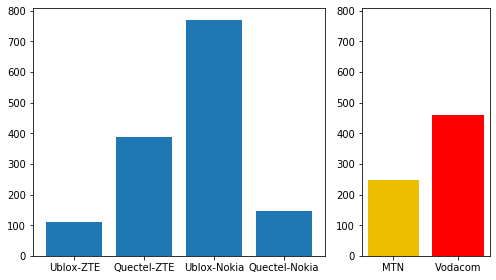

In [192]:
plot('Signal power', 'rxBytes', 'RSRP (dBm)', 'RX Bytes (B)', scale=[10,1], invert=[False, True], K=3)
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|                    |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|--------------------|-------------|---------------|-----------------|-------------------|
| ACK/NACK RX Packet |        20.1 |           7.5 |         13.2121 |           12.2667 |
|                   |   MTN |   Vodacom |
|-------------------|-------|-----------|
| ACK/NACK RX Packe |  13.8 |   12.7394 |
RSRP (dBm)


[20.1, 7.5, 13.212121212121213, 12.266666666666667]

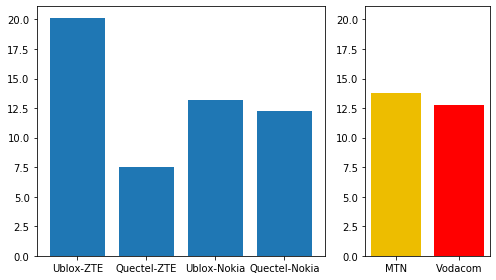

In [193]:
d=plot('Signal power', 'Total ACK NACK RX', 'RSRP (dBm)', 'ACK/NACK RX Packets', scale=[10,1], invert=[False, True], K=3)#, loc='upper center', bbox=None)
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|              |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|--------------|-------------|---------------|-----------------|-------------------|
| TX Bytes (B) |     345.013 |       852.081 |            3113 |           446.482 |
|              |     MTN |   Vodacom |
|--------------|---------|-----------|
| TX Bytes (B) | 598.547 |   1779.74 |
SINR (dB)


[345.0126126126126, 852.0809803921569, 3112.9957264957266, 446.48214285714283]

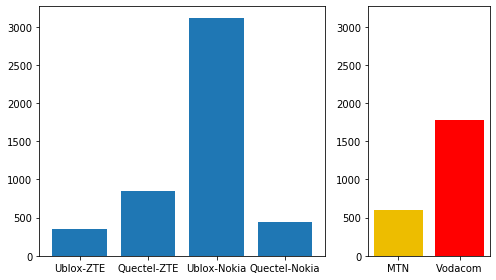

In [194]:
d=plot('SNR', 'txBytes', 'SINR (dB)', 'TX Bytes (B)', scale=[10,1], invert=[False, True], K=3)
[np.mean(m) for m in d]

# #Memory

custom jupyter @DanielRobinson
|                    |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|--------------------|-------------|---------------|-----------------|-------------------|
| Currently allocate |     26195.4 |       16282.4 |         26157.7 |           16282.8 |
|                    |     MTN |   Vodacom |
|--------------------|---------|-----------|
| Currently allocate | 21238.9 |   21220.3 |
RSRP (dBm)


[26195.36842105263, 16282.439024390244, 26157.739130434784, 16282.76923076923]

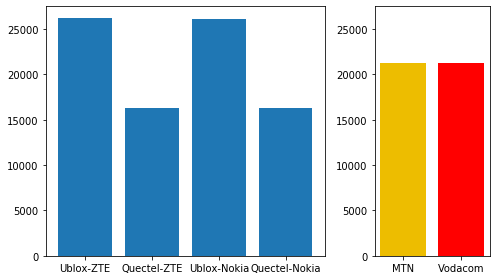

In [195]:
d=plot('Signal power', 'Current Allocated', 'RSRP (dBm)', 'Currently allocated memory', scale=[10,1], invert=[False, True])
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|                   |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|-------------------|-------------|---------------|-----------------|-------------------|
| Total free memory |     17140.6 |       6717.56 |         17178.3 |           6717.23 |
|                   |     MTN |   Vodacom |
|-------------------|---------|-----------|
| Total free memory | 11929.1 |   11947.7 |
RSRP (dBm)


[17140.63157894737, 6717.5609756097565, 17178.260869565216, 6717.2307692307695]

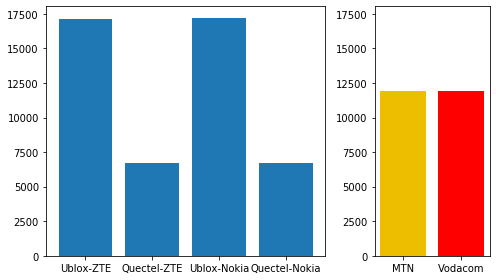

In [196]:
d=plot('Signal power', 'Total Free', 'RSRP (dBm)', 'Total free memory', scale=[10,1], invert=[False, True])
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|                 |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|-----------------|-------------|---------------|-----------------|-------------------|
| Max free memory |       15264 |       6706.63 |           15264 |           6705.74 |
|                 |     MTN |   Vodacom |
|-----------------|---------|-----------|
| Max free memory | 10985.3 |   10984.9 |
RSRP (dBm)


[15264.0, 6706.634146341464, 15264.0, 6705.74358974359]

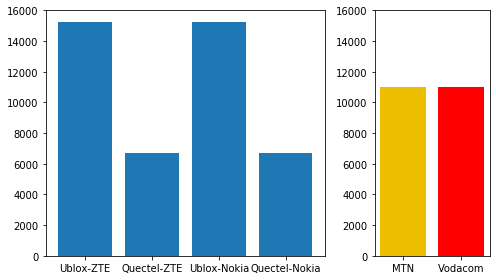

In [197]:
d=plot('Signal power', 'Max Free', 'RSRP (dBm)', 'Max free memory', scale=[10,1], invert=[False, True])
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|                   |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|-------------------|-------------|---------------|-----------------|-------------------|
| Num Allocs memory |     1929.51 |       1891.28 |         935.858 |           1649.79 |
|                   |     MTN |   Vodacom |
|-------------------|---------|-----------|
| Num Allocs memory | 1910.39 |   1292.83 |
RSRP (dBm)


[1929.5056338899194, 1891.280113378685, 935.8584235167702, 1649.7939197581604]

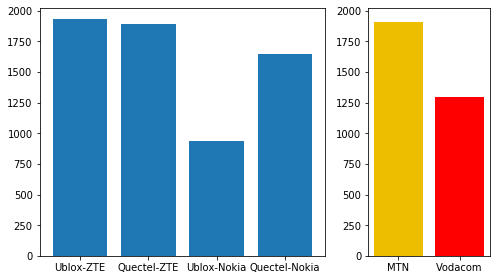

In [198]:
d=plot('Signal power', 'Num Allocs', 'RSRP (dBm)', 'Num Allocs memory', scale=[10,1], invert=[False, True], K=3)
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|                  |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|------------------|-------------|---------------|-----------------|-------------------|
| Num Frees memory |     1715.42 |       1825.09 |         710.652 |           1583.63 |
|                  |     MTN |   Vodacom |
|------------------|---------|-----------|
| Num Frees memory | 1770.26 |   1147.14 |
RSRP (dBm)


[1715.4192846835704, 1825.0914290160508, 710.6522202220222, 1583.6255954664184]

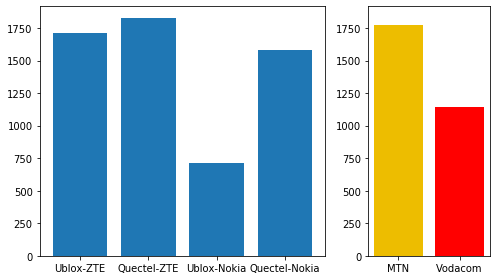

In [199]:
d=plot('Signal power', 'Num Frees', 'RSRP (dBm)', 'Num Frees memory', scale=[10,1], invert=[False, True], K=3)
[np.mean(m) for m in d]

# #Throughput

custom jupyter @DanielRobinson
|            |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|------------|-------------|---------------|-----------------|-------------------|
| RLC UL (B) |     468.846 |       336.887 |         345.109 |           201.274 |
|            |     MTN |   Vodacom |
|------------|---------|-----------|
| RLC UL (B) | 402.866 |   273.191 |
RSRP (dBm)


[468.84615384615387,
 336.88652482269504,
 345.10873983739833,
 201.27380952380955]

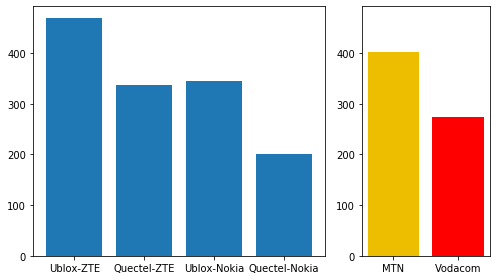

In [200]:
d=plot('Signal power', 'RLC UL', 'RSRP (dBm)', 'RLC UL (B)', scale=[10,1], invert=[False, True], K=3)
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|            |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|------------|-------------|---------------|-----------------|-------------------|
| RLC DL (B) |     240.222 |       144.186 |         77.1014 |           43.2787 |
|            |     MTN |   Vodacom |
|------------|---------|-----------|
| RLC DL (B) | 192.204 |     60.19 |
RSRP (dBm)


[240.22222222222223, 144.18627450980392, 77.10139573070607, 43.278703703703705]

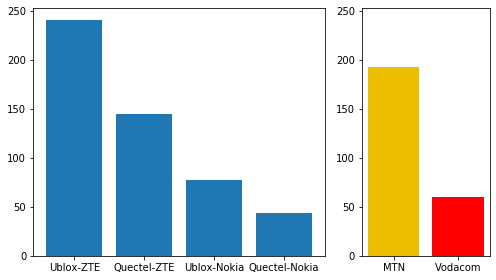

In [201]:
d=plot('Signal power', 'RLC DL', 'RSRP (dBm)', 'RLC DL (B)', scale=[10,1], invert=[False, True], K=3)
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|            |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|------------|-------------|---------------|-----------------|-------------------|
| MAC UL (B) |     568.269 |       554.038 |         357.295 |           292.272 |
|            |     MTN |   Vodacom |
|------------|---------|-----------|
| MAC UL (B) | 561.154 |   324.784 |
RSRP (dBm)


[568.2692307692307, 554.0381944444445, 357.29528985507244, 292.2723039215686]

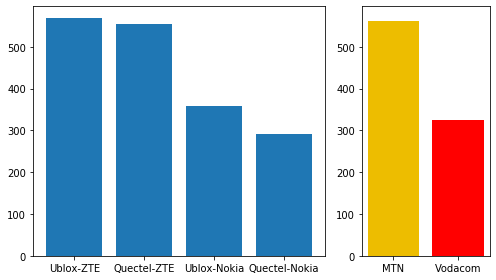

In [202]:
d=plot('Signal power', 'MAC UL', 'RSRP (dBm)', 'MAC UL (B)', scale=[10,1], invert=[False, True], K=3)
[np.mean(m) for m in d]

custom jupyter @DanielRobinson
|            |   Ublox-MTN |   Quectel-MTN |   Ublox-Vodacom |   Quectel-Vodacom |
|------------|-------------|---------------|-----------------|-------------------|
| MAC UL (B) |     321.125 |       181.181 |         87.4659 |           55.1858 |
|            |     MTN |   Vodacom |
|------------|---------|-----------|
| MAC UL (B) | 251.153 |   71.3259 |
RSRP (dBm)


[321.125, 181.18055555555557, 87.46593406593406, 55.18582089552238]

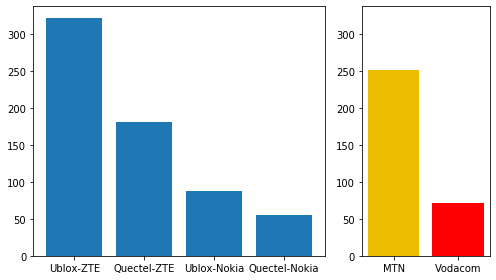

In [203]:
d=plot('Signal power', 'MAC DL', 'RSRP (dBm)', 'MAC UL (B)', scale=[10,1], invert=[False, True], K=3)
[np.mean(m) for m in d]

# #Network metrics

custom jupyter @DanielRobinson


No handles with labels found to put in legend.


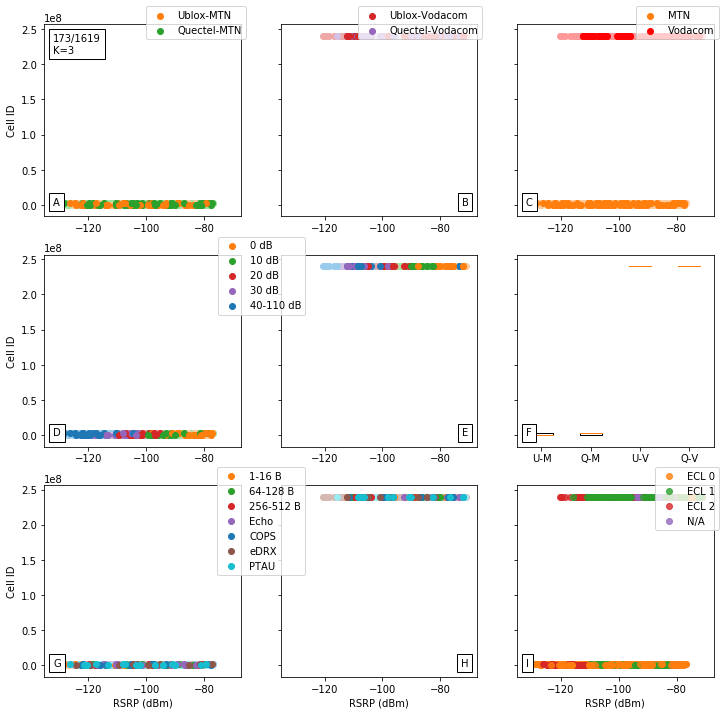

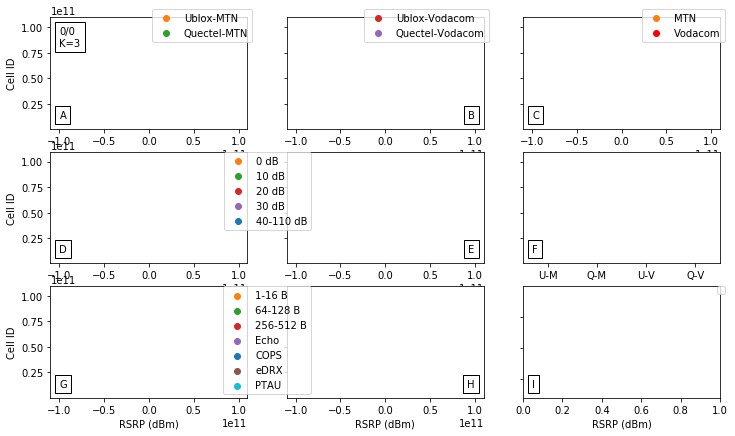

7 4 5
ky Cell ID 173 + 0 = 173


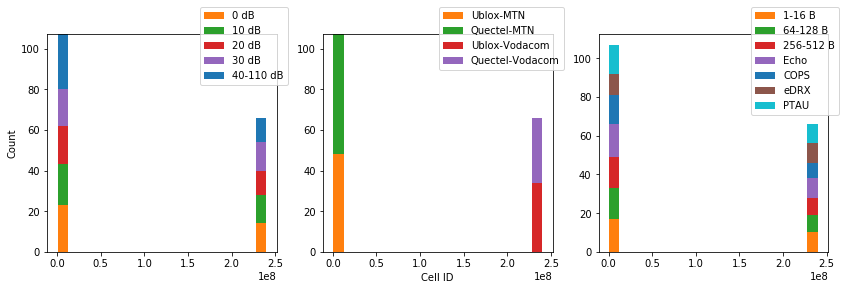

In [73]:
plot('Signal power', 'Cell ID', 'RSRP (dBm)', 'Cell ID', scale=[10,1], invert=[False, True], K=3)

ky Cell_ID 173 + 0 = 173


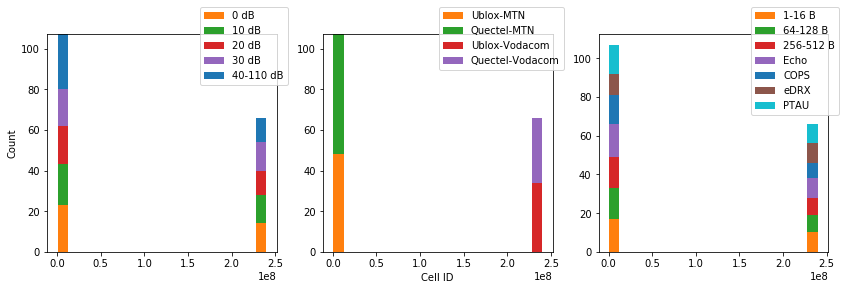

[ 484196. 2671716. 2672484.] [34 13  1]
[ 484196. 2671716. 2672484.] [26 29  4]
[2.399e+08] [34]
[2.399e+08] [32]
|                 |   239882509 |   2671716 |   2672484 |   484196 |
|-----------------|-------------|-----------|-----------|----------|
| Ublox-MTN       |          34 |        13 |         1 |        0 |
| Quectel-MTN     |          26 |        29 |         4 |          |
| Ublox-Vodacom   |          34 |           |           |          |
| Quectel-Vodacom |          32 |           |           |          |


In [300]:
_, _, cellid = p3.hist()
# cid = np.array([np.array(cd) for cd in cellid])
cid = cellid
ulist = []
clist = []
tab = []
nw = ["Ublox-MTN", "Quectel-MTN", "Ublox-Vodacom", "Quectel-Vodacom"]
for c, n in zip(cid, nw):
    u, cnts = np.unique(c, return_counts=True)
    print(u, cnts)
    t = [[n], cnts]
    t = [p for r in t for p in r]
    tab.append(t)
    ulist.append(u)
    clist.append(c)
#     print(np.unique([s for u in ulist for s in u]), u)
# tab
# table = [["Ublox-MTN",42,3], ["Quectel-MTN",451,3], ["Ublox-Vodacom",4], ["Quectel-Vodacom",3]]
# headers = ["", "qty", "sun"]
headers = np.unique([str(int(el)) for u in ulist for el in u])
headers = np.insert(headers, 0, '')
tab[0].append(0)
print(tabulate(tab, headers, tablefmt="github"))

In [153]:
plot('Signal power', 'ECL', 'RSRP (dBm)', 'ECL', scale=[10,1], invert=[False, True], K=4)

custom jupyter @DanielRobinson


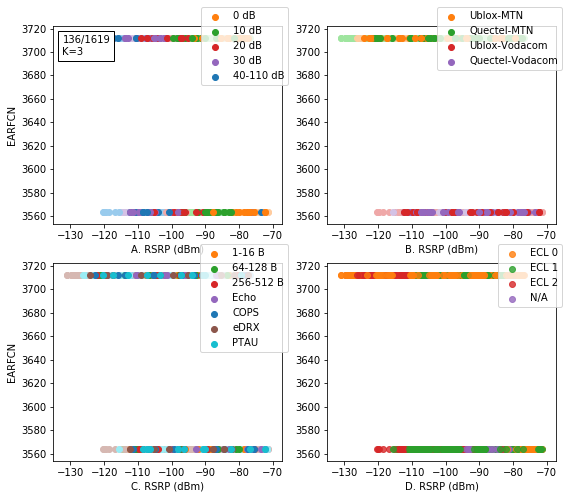

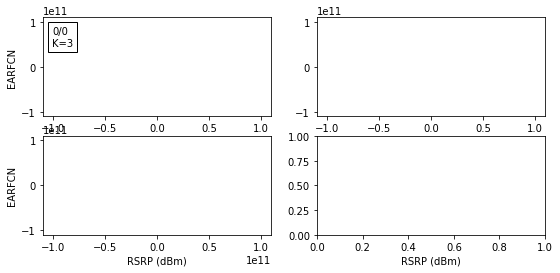

7 4 5
ky EARFCN 136 + 0 = 136


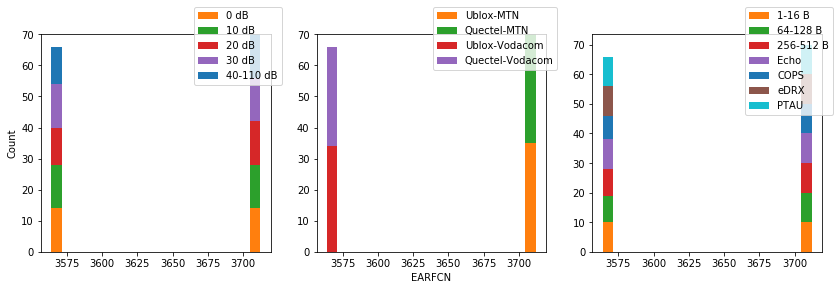

In [301]:
plot('Signal power', 'EARFCN', 'RSRP (dBm)', 'EARFCN', scale=[10,1], invert=[False, True])

ky EARFCN 136 + 0 = 136


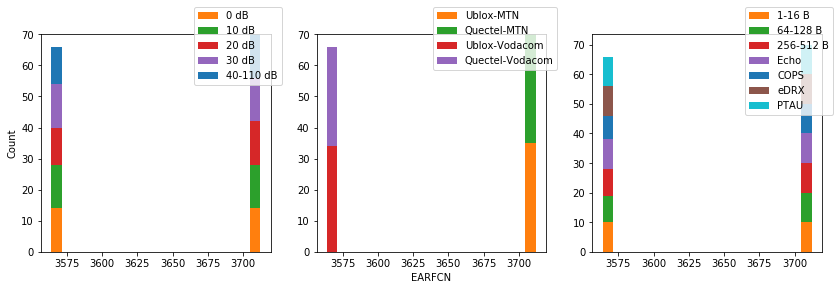

[3712.] [35]
[3712.] [35]
[3564.] [34]
[3564.] [32]
|                 |   3564 |   3712 |
|-----------------|--------|--------|
| Ublox-MTN       |     35 |      0 |
| Quectel-MTN     |     35 |        |
| Ublox-Vodacom   |     34 |        |
| Quectel-Vodacom |     32 |        |


In [302]:
_, _, cellid = p3.hist()
# cid = np.array([np.array(cd) for cd in cellid])
cid = cellid
ulist = []
clist = []
tab = []
nw = ["Ublox-MTN", "Quectel-MTN", "Ublox-Vodacom", "Quectel-Vodacom"]
for c, n in zip(cid, nw):
    u, cnts = np.unique(c, return_counts=True)
    print(u, cnts)
    t = [[n], cnts]
    t = [p for r in t for p in r]
    tab.append(t)
    ulist.append(u)
    clist.append(c)
#     print(np.unique([s for u in ulist for s in u]), u)
# tab
# table = [["Ublox-MTN",42,3], ["Quectel-MTN",451,3], ["Ublox-Vodacom",4], ["Quectel-Vodacom",3]]
# headers = ["", "qty", "sun"]
headers = np.unique([str(int(el)) for u in ulist for el in u])
headers = np.insert(headers, 0, '')
tab[0].append(0)
print(tabulate(tab, headers, tablefmt="github"))

custom jupyter @DanielRobinson


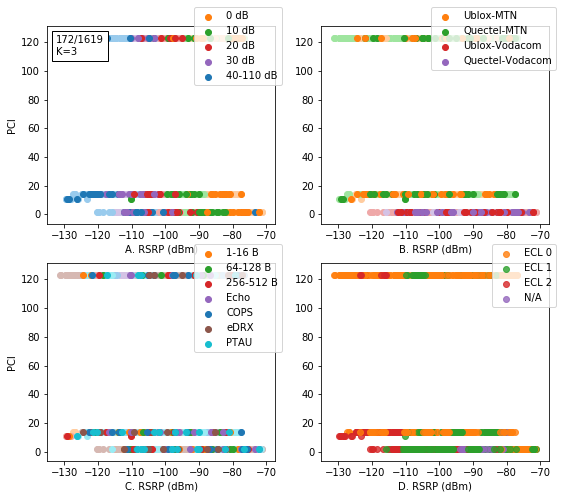

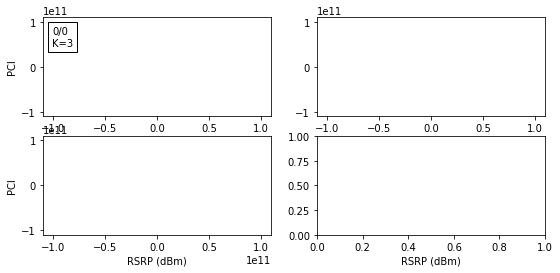

7 4 5
ky PCI 172 + 0 = 172


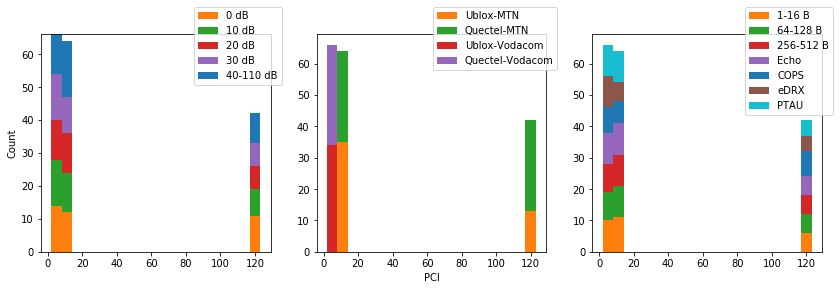

In [303]:
plot('Signal power', 'PCI', 'RSRP (dBm)', 'PCI', scale=[10,1], invert=[False, True], K=3)

ky PCI 172 + 0 = 172


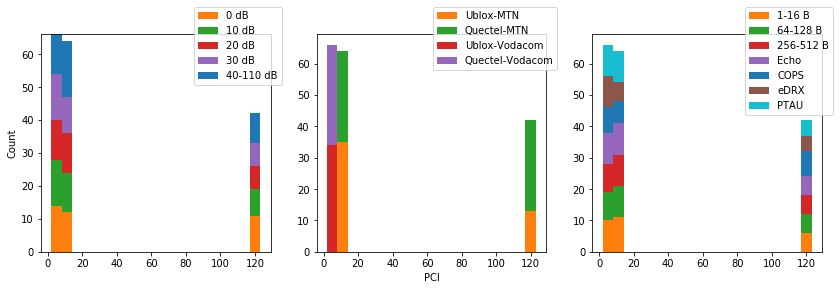

[ 11.  14. 123.] [ 1 34 13]
[ 11.  14. 123.] [ 3 26 29]
[2.] [34]
[2.] [32]
|                 |   11 |   123 |   14 |   2 |
|-----------------|------|-------|------|-----|
| Ublox-MTN       |    1 |    34 |   13 |   0 |
| Quectel-MTN     |    3 |    26 |   29 |     |
| Ublox-Vodacom   |   34 |       |      |     |
| Quectel-Vodacom |   32 |       |      |     |


In [306]:
_, _, cellid = p3.hist()
# cid = np.array([np.array(cd) for cd in cellid])
cid = cellid
ulist = []
clist = []
tab = []
nw = ["Ublox-MTN", "Quectel-MTN", "Ublox-Vodacom", "Quectel-Vodacom"]
for c, n in zip(cid, nw):
    u, cnts = np.unique(c, return_counts=True)
    print(u, cnts)
    t = [[n], cnts]
    t = [p for r in t for p in r]
    tab.append(t)
    ulist.append(u)
    clist.append(c)
#     print(np.unique([s for u in ulist for s in u]), u)
# tab
# table = [["Ublox-MTN",42,3], ["Quectel-MTN",451,3], ["Ublox-Vodacom",4], ["Quectel-Vodacom",3]]
# headers = ["", "qty", "sun"]
headers = np.unique([str(int(el)) for u in ulist for el in u])
headers = np.insert(headers, 0, '')
tab[0].append(0)
print(tabulate(tab, headers, tablefmt="github"))